# Assignment 3: ICP + Non-linear least squares optimization

TEAM-ID: 16  <br>
TEAM-NAME: spacex <br>
YOUR-ID: 2019121004, 2018102002 <br>
YOUR-NAME: Avani Gupta, Sreeharsha Paruchuri  <br>



## Instructions

* Please check Moodle for "TEAM-ID" and "TEAM-NAME" fields above. Some of your names have been edited because of redundancy/simplicity. Instructions for submitting the assignment through GitHub Classrooms/Moodle has been uploaded on Moodle. Any clarifications will be made there itself.
* Code must be written in Python in Jupyter Notebooks. You can use Assignment-1's environment for this assignment. More instructions for setup provided as you progress through this assignment.
* Both the team members must submit the zip file.
* You are not allowed to use any external libraries (other than ones being imported below).
* Answer the descriptive questions in your own words with context & clarity. Do not just copy-paste from some Wikipedia page. You will be evaluated accordingly.
* You could split the Jupyter Notebook cells where TODO is written, but please try to avoid splitting/changing the structure of other cells.

In [1]:
import numpy as np
import math
import matplotlib.pyplot as plt
import time

# Question 1: Simple Non-Linear least squares for Gaussian function

First, go through the [solved example here](https://www.notion.so/saishubodh/From-linear-algebra-to-non-linear-weighted-least-squares-13cf17d318be4d45bb8577c4d3ea4a02#1de60a8465664d39a12af24353feef9e) from the [notes page](https://www.notion.so/saishubodh/Mobile-Robotics-2020-Students-Page-0b65a9c20edd4081978f4ffad917febb#a68cabac64754fa485144cc89b4b8c65). After understanding this, 

(1.1) Code it from scratch using `numpy` and try it out yourself for say different number of iterations with a certain tolerance for all 50 observations using Gradient Descent. Make the following plots using `matplotlib`:
   * Data and fit plot: Ground truth Gaussian, observations (points) & predicted Gaussian on the same plot.
   * Cost function ($\|r\|^2$) vs number of iterations   
   
Experiment with the hyperparameters and compile your observations in a table. Clearly mention your hyperparameters with justification.

(1.2) You've used Gradient Descent above. Now implement Gauss-Newton and LM algorithms. To contrast between the three, you must experiment with 
   * Different initial estimate: Can a particular algorithm handle if the initial estimate is too far from GT?
   * Different number of observations: Can a particular algorithm handle very less observations?
   * Add [noise](https://numpy.org/doc/stable/reference/random/generated/numpy.random.normal.html) to your observations: Can a particular algorithm handle large noise?
   * What else can you think of? (For example, can an algorithm converge in less iterations compared to others?)
    
Make the plots (mentioned in 1.1) for all 3 algorithms. Report your observations in a table(s) (comparison between the three for different factors). You will be awarded depending on how comprehensive your experimentation is (which you have to explain below under "**Answers for Question 1**" section).

## Code for Question 1

In [2]:
#() Only numpy & matplotlib is sufficient for this question.
##############################################################################
# TODO: Do tasks described in Question 1                                     #
##############################################################################
# Replace "pass" statement with your code (You can split this cell into
# multiple cells if you wish to)
def gaussian(xVec, a, m, s):
    # Returning an array of gaussian sampled values dictated by the given parameters.
    return a*np.exp(-((xVec-m)**2)/(2*(s**2)))
    
def jacobian(xVec, a, m, s):
    # Calculates the Jacobian of the gaussian distribution.
    row1 = []
    row2 = []
    row3 = []
    
    for x in xVec:
        row1.append(math.exp(- (x - m) ** 2 / (2 * s ** 2))) 
        
    for x in xVec:
        row2.append((a* (x - m)/(s ** 2))*math.exp((- np.square(x - m) / (2 * np.square(s))))) 

    for x in xVec:
        row3.append((a/(s ** 3)) * ((x - m) ** 2) * math.exp((- (x - m) ** 2 / (2 * s ** 2)))) 
    
    row1 = np.array([row1])
    row2 = np.array([row2])
    row3 = np.array([row3])

    return np.vstack((row1, np.vstack((row2, row3)))).T
    
def residual(xVec, a, m, s, yObserved):
    # Calculating the residual, the difference between the observed and the calculated value
    obs = len(xVec)
    output = []
    
    for i in range(obs):
        output.append(a * math.exp(- (xVec[i] - m) ** 2 / (2 * s ** 2)) - yObserved[i])
    output = np.array(output)
        
    return output
    
def loss(xVec, a, m, s, yObserved):
    # Formulating loss as a non linear least squares optimization.
    obs = len(xVec)
    output = []
    for i in range(obs):
        output.append((a * math.exp(- (xVec[i] - m) ** 2 / (2 * s ** 2)) - yObserved[i])**2)
    output = np.array(output)
    return np.sum(output)

    
def plot(xObserved,yObserved, yPredicted,squaredDistance,tit):
    plt.figure(figsize=(12, 4))
    plt.subplot(121)
    plt.plot(squaredDistance)
    plt.title('loss vs number of iterations for '+str(tit))
    plt.xlabel('iterations')
    plt.ylabel('loss')
    plt.subplot(122)
    plt.plot(xObserved,yObserved,label='Ground Truth')
    plt.plot(xObserved,yPredicted,label='Predicted')
    plt.plot(xObserved,yObserved,'b.')
    
    plt.title('Predicted vs GT Gaussians by '+str(tit))
    plt.legend()
    plt.show('Levenberg–Marquardt')

def gradDescent(xObserved,yObserved,calculatedPrameters,lr,tolerance):
    converged = 0
    iterations = 1000
    loss_arr = []
    for i in range(iterations):
        res = residual(xObserved, calculatedPrameters[0], calculatedPrameters[1], calculatedPrameters[2], yObserved)
        jack = jacobian(xObserved, calculatedPrameters[0], calculatedPrameters[1], calculatedPrameters[2])
        nllsJack = np.matmul(jack.T, res)
        calculatedPrameters = calculatedPrameters - lr * nllsJack

        squaredDistance = loss(xObserved, calculatedPrameters[0], calculatedPrameters[1], calculatedPrameters[2], yObserved)
        yPredicted = gaussian(xObserved, calculatedPrameters[0], calculatedPrameters[1], calculatedPrameters[2])
        loss_arr.append(squaredDistance)
        if np.sum(squaredDistance) < tolerance:
            print("Gradient Descent converged at iteration ",i)
            print("loss:",squaredDistance)
            print("a_est:",calculatedPrameters[0]," m_est:",calculatedPrameters[1], " s_est:",calculatedPrameters[2])
#             plot(xObserved,yObserved, yPredicted,np.array(loss_arr),"GD")
            converged = 1
            break
    if(converged==0):
        print("gradient descent algorithm didn't converge in ",i," iterations for given parameters of tolerance",tolerance," learning rate",lr)
        print("loss:",squaredDistance)
        print("a_est:",calculatedPrameters[0]," m_est:",calculatedPrameters[1], " s_est:",calculatedPrameters[2])
#         plot(xObserved,yObserved, yPredicted,np.array(loss_arr),"Gradient Descent")
    return yPredicted,np.array(loss_arr)

def gaussNewton(xObserved,yObserved,calculatedPrameters,lr,tolerance):
    converged = 0
    iterations = 1000
    loss_arr = []
    for i in range(iterations):
        res = residual(xObserved, calculatedPrameters[0], calculatedPrameters[1], calculatedPrameters[2], yObserved)
        jack = jacobian(xObserved, calculatedPrameters[0], calculatedPrameters[1], calculatedPrameters[2])
        calculatedPrameters = calculatedPrameters - np.linalg.pinv(jack)@res

        squaredDistance = loss(xObserved, calculatedPrameters[0], calculatedPrameters[1], calculatedPrameters[2], yObserved)
        yPredicted = gaussian(xObserved, calculatedPrameters[0], calculatedPrameters[1], calculatedPrameters[2])
        loss_arr.append(squaredDistance)
        if np.sum(squaredDistance) < tolerance:
            print("Gauss Newton converges at iteration ",i)
            print("loss:",squaredDistance)
            print("a_est:",calculatedPrameters[0]," m_est:",calculatedPrameters[1], " s_est:",calculatedPrameters[2])
#             plot(xObserved,yObserved, yPredicted,np.array(loss_arr),"Gauss Newton")
            converged = 1
            break
    if(converged==0):
        print("Gauss Newton Algorithm didn't converge in ",i," iterations for given parameters of tolerance",tolerance," learning rate",lr)
        print("loss:",squaredDistance)
        print("a_est:",calculatedPrameters[0]," m_est:",calculatedPrameters[1], " s_est:",calculatedPrameters[2])
#         plot(xObserved,yObserved, yPredicted,np.array(loss_arr),"Gauss Newton")
    return yPredicted,np.array(loss_arr)
def LM(xObserved,yObserved,calculatedPrameters,lr,tolerance):
    iterations = 1000
    loss_arr = []
    converged = 0
    for i in range(iterations):
        res = residual(xObserved, calculatedPrameters[0], calculatedPrameters[1], calculatedPrameters[2], yObserved)
        jack = jacobian(xObserved, calculatedPrameters[0], calculatedPrameters[1], calculatedPrameters[2])
        jack = jack.astype('float64') 
        I_lr = lr*np.eye(jack.shape[1])
        I_lr = I_lr.astype('float64') 
        nllsJack = np.linalg.pinv((jack.T@jack)+(I_lr+1e-30))@jack.T   
                
        calculatedPrameters = calculatedPrameters - nllsJack@res
        currloss = loss(xObserved, calculatedPrameters[0], calculatedPrameters[1], calculatedPrameters[2], yObserved)
        
        if(i!=0):
            if currloss <= squaredDistance:
                lr /= 10
            else:
                lr *= 10
    
        jack = jacobian(xObserved, calculatedPrameters[0], calculatedPrameters[1], calculatedPrameters[2])
        jack = jack.astype('float64') 
        I_lr = lr*np.eye(jack.shape[1])
        I_lr = I_lr.astype('float64') 
        nllsJack = np.linalg.pinv((jack.T@jack)+(I_lr)+1e-30)@jack.T   
                
        calculatedPrameters = calculatedPrameters - nllsJack@res

        squaredDistance = loss(xObserved, calculatedPrameters[0], calculatedPrameters[1], calculatedPrameters[2], yObserved)
        yPredicted = gaussian(xObserved, calculatedPrameters[0], calculatedPrameters[1], calculatedPrameters[2])
        loss_arr.append(squaredDistance)
        if np.sum(squaredDistance) < tolerance:
            print("Levenberg–Marquardt converges at iteration ",i)
            print("loss:",squaredDistance)
            print("a_est:",calculatedPrameters[0]," m_est:",calculatedPrameters[1], " s_est:",calculatedPrameters[2])
#             plot(xObserved,yObserved, yPredicted,np.array(loss_arr),"LM")
            converged = 1
            
            break
    if(converged==0):
        print("The Levenberg–Marquardt Algorithm didn't converge in ",i," iterations for given parameters of tolerance",tolerance," learning rate",lr)
        print("loss:",squaredDistance)
        print("a_est:",calculatedPrameters[0]," m_est:",calculatedPrameters[1], " s_est:",calculatedPrameters[2])
#         plot(xObserved,yObserved, yPredicted,np.array(loss_arr),"LM")
    return yPredicted,np.array(loss_arr)
##############################################################################
#                             END OF YOUR CODE                               #
##############################################################################


In [3]:
def combinedplot(xObserved,yObserved,ygd,lgd,ygn,lgn,ylm,llm):
    plt.figure(figsize=(12, 4))
    plt.subplot(121)
    plt.plot(lgd,'r--',label = 'Gradient Descent')
    plt.plot(lgn,'m.',label = 'Gauss Newton')
    plt.plot(llm,'g*',label = 'Levenberg–Marquardt')
    plt.title('loss vs number of iterations')
    plt.xlabel('iterations')
    plt.ylabel('loss')
    plt.legend()

    plt.subplot(122)
    plt.plot(xObserved,yObserved,'b.',label='Ground Truth')
    plt.plot(xObserved,ygd,'r',label = 'Gradient Descent')
    plt.plot(xObserved,ygn,'m',label = 'Gauss-Newton')
    plt.plot(xObserved,ylm,'g',label = 'Levenberg–Marquardt')
    plt.title('Combined Data and fit plot')
    plt.legend()
    plt.show()
    

Gradient Descent converged at iteration  437
loss: 0.00983855224832958
a_est: 9.983879338286183  m_est: 0.0003810694168602857  s_est: 20.089773728976823


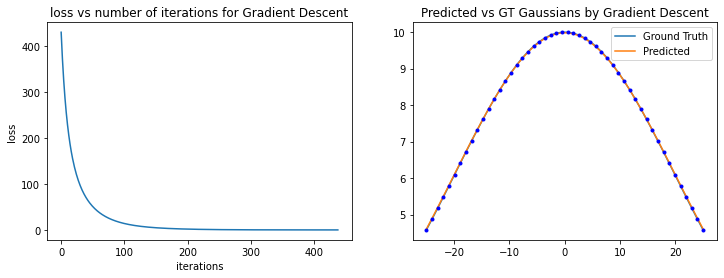

Gauss Newton converges at iteration  3
loss: 6.229699393620347e-05
a_est: 9.998337196905194  m_est: 0.002102935591206556  s_est: 20.00402659090192


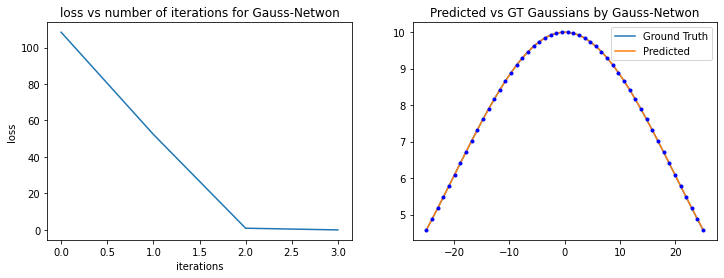

Levenberg–Marquardt converges at iteration  2
loss: 5.730362110598665
a_est: 10.254077061575403  m_est: -1.0498505979479578  s_est: 18.798688886556167


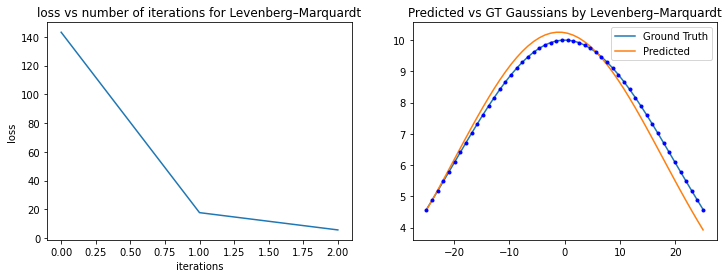

In [4]:
## Define the plots inside a function above and call them in this cell one by one. When I run this cell, all plots
## asked in Q1 should be generated. 
##############################################################################
# TODO: Plotting for Question 1                                              #
# Tester code -- EVERYTHING IN ONE CELL

numberOfObservations = 50
xObserved = np.linspace(-25, 25, numberOfObservations)
a_gt = 10
m_gt = 0
s_gt = 20
a_est = 10
m_est = 13
s_est = 19.12
yObserved = gaussian(xObserved, a_gt, m_gt, s_gt)
calculatedPrameters = np.array([a_est, m_est, s_est])

ygd,lgd = gradDescent(xObserved,yObserved,calculatedPrameters,0.01,1e-2)
plot(xObserved,yObserved,ygd, lgd,"Gradient Descent")
ygn,lgn = gaussNewton(xObserved,yObserved,calculatedPrameters,0.01,1e-2)
plot(xObserved,yObserved, ygn, lgn,"Gauss-Netwon")
ylm,llm = LM(xObserved,yObserved,calculatedPrameters,10,1e+1)
plot(xObserved,yObserved, ylm, llm,"Levenberg–Marquardt")




##############################################################################
#                             END OF YOUR CODE                               #
##############################################################################

From the above graphs we can see that for the parameters that Gradient descent performs poorly when compared to the other two. This is observable from the number of iterations taken for each algorithm to converge. The graph for Gradient descent is on another scale. This demonstrates the superiority of the other two optimisation methods to gradient descent. <br/> <br/>
While for the given set of initialisations, Gauss newton outperforms gradient descent, this observation is extended for other initialisations as well. Gauss newton is able to converge to the local minima faster than gradient descent as it assumes that each funcion is locally quadratic.<br/><br/>
Sadly, that comes with it's own drawbacks, this involves knowledge obtained from the second derivate, computation of which is very intensive and thus proves to be rather infeasible.
This is where the Levenberg–Marquardt algorithm comes into its own. When far away from a minima, it acts like a gradient descent optimisation method. This is feasible thanks to its low computation cost. As the parameters converge to the minima, the Levenberg–Marquardt algorithm uses the Gauss Newton optimisation algorithm to find the minima.

# Optimising Gradient descent parameters

Gradient Descent converged at iteration  534
loss: 0.000983315055940316
a_est: 9.994903832848399  m_est: 2.461133127015614e-05  s_est: 20.02827347657325


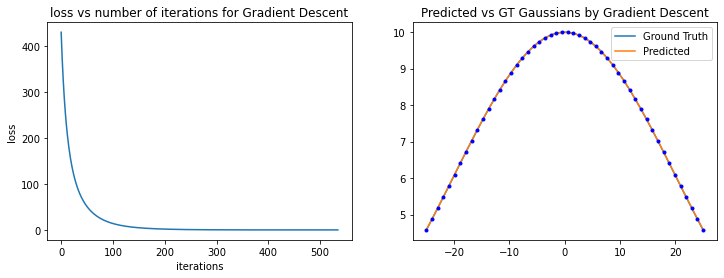

In [5]:

numberOfObservations = 50
xObserved = np.linspace(-25, 25, numberOfObservations)
a_gt = 10
m_gt = 0
s_gt = 20
a_est = 10
m_est = 13
s_est = 19.12
yObserved = gaussian(xObserved, a_gt, m_gt, s_gt)
calculatedPrameters = np.array([a_est, m_est, s_est])
ygd,lgd = gradDescent(xObserved,yObserved,calculatedPrameters,0.01,1e-3)
plot(xObserved,yObserved,ygd, lgd,"Gradient Descent")

Gradient Descent converged at iteration  534
loss: 0.000983315055940316
a_est: 9.994903832848399  m_est: 2.461133127015614e-05  s_est: 20.02827347657325


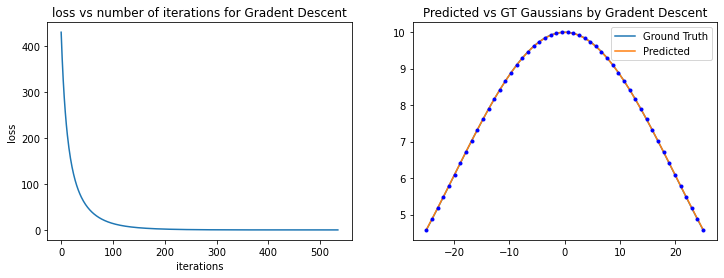

Gradient Descent converged at iteration  437
loss: 0.00983855224832958
a_est: 9.983879338286183  m_est: 0.0003810694168602857  s_est: 20.089773728976823


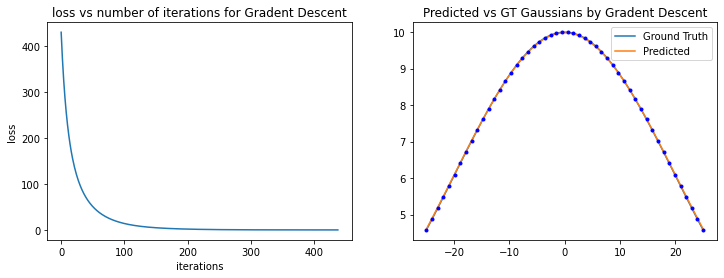

Gradient Descent converged at iteration  337
loss: 0.09899244775254672
a_est: 9.948877534392215  m_est: 0.006139702817200705  s_est: 20.288135634862776


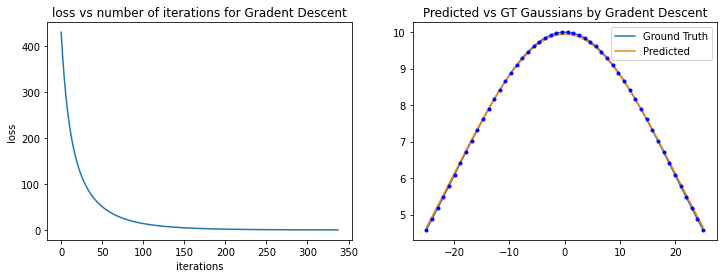

Gradient Descent converged at iteration  229
loss: 0.9871879843820822
a_est: 9.840596816487373  m_est: 0.10601728929519547  s_est: 20.93342186690136


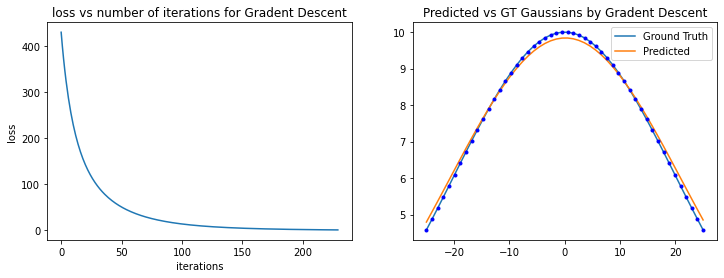

Gradient Descent converged at iteration  115
loss: 9.829260268328731
a_est: 9.608692938123435  m_est: 1.4171677571178727  s_est: 22.522468934557253


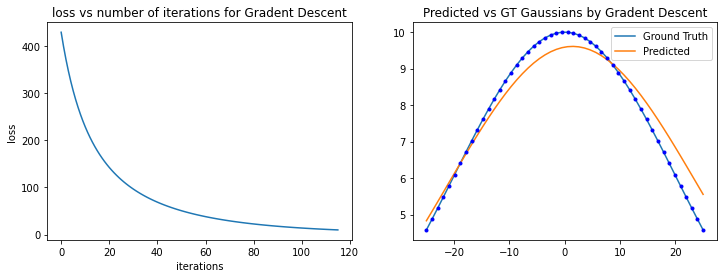

Gradient Descent converged at iteration  30
loss: 96.50726091112924
a_est: 9.640735602761751  m_est: 6.91689953829249  s_est: 22.826981339510326


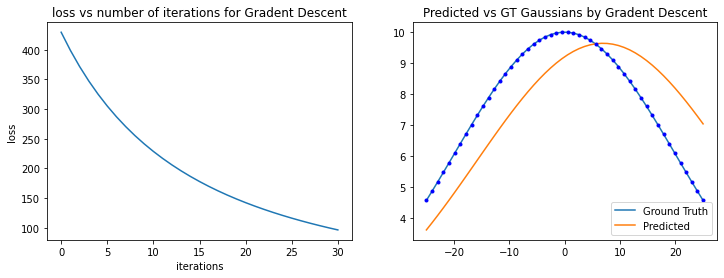

In [6]:
tolerance = [1e-3,1e-2,1e-1,1,1e+1,1e+2]
for t in tolerance:
    ygd,lgd = gradDescent(xObserved,yObserved,calculatedPrameters,0.01,t)
    plot(xObserved,yObserved,ygd, lgd,"Gradent Descent")

gradient descent algorithm didn't converge in  999  iterations for given parameters of tolerance 0.01  learning rate 0.0001
loss: 244.48737461270264
a_est: 9.918497561085035  m_est: 10.42188691583679  s_est: 21.134393038947387


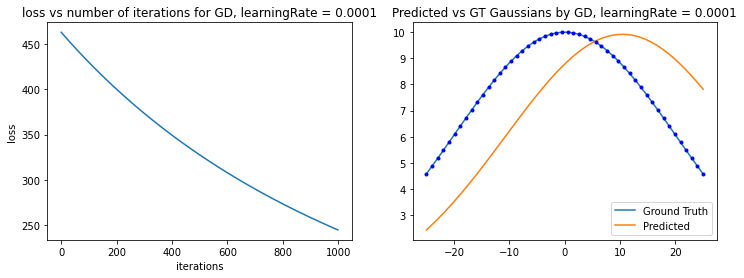

gradient descent algorithm didn't converge in  999  iterations for given parameters of tolerance 0.01  learning rate 0.001
loss: 14.123791568974372
a_est: 9.582518592742808  m_est: 1.9573486106891116  s_est: 22.74004930353681


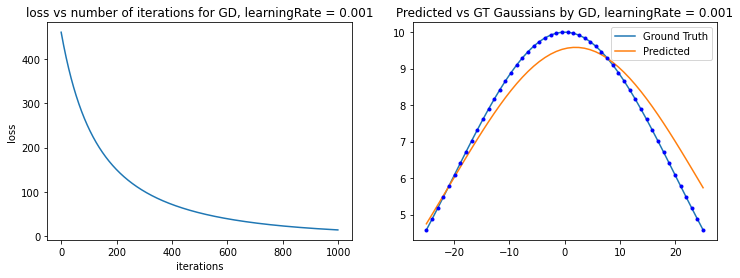

Gradient Descent converged at iteration  437
loss: 0.00983855224832958
a_est: 9.983879338286183  m_est: 0.0003810694168602857  s_est: 20.089773728976823


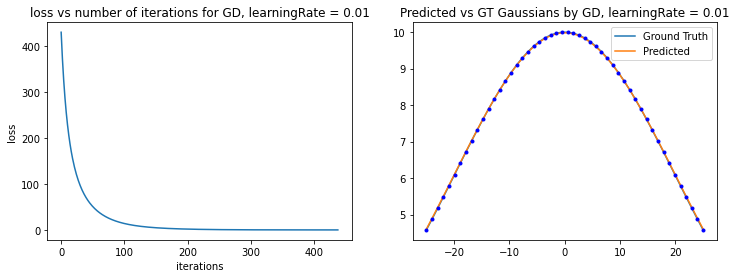

gradient descent algorithm didn't converge in  999  iterations for given parameters of tolerance 0.01  learning rate 0.1
loss: 3226.679414252767
a_est: -125.51620545318187  m_est: 80.49221057521616  s_est: -9.042245279619415


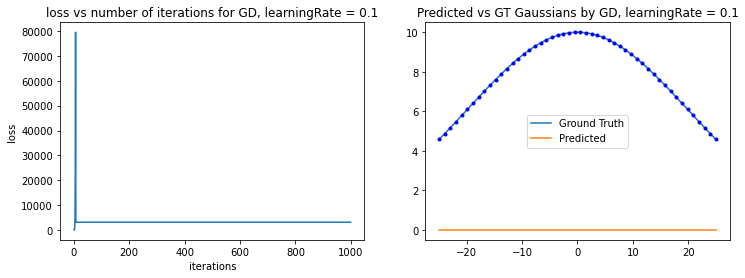

gradient descent algorithm didn't converge in  999  iterations for given parameters of tolerance 0.01  learning rate 1.0
loss: 251.12364291814873
a_est: 440142.66885355505  m_est: -167867.68666039224  s_est: -36167.47894579422


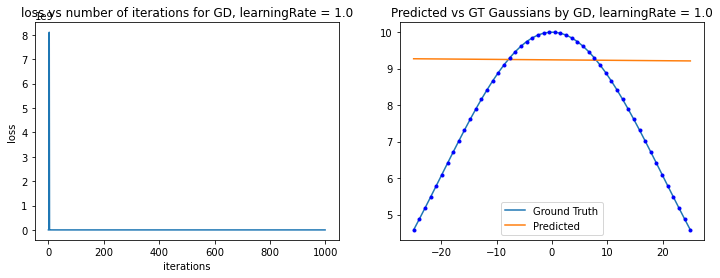

In [7]:
numberOfObservations = 50
xObserved = np.linspace(-25, 25, numberOfObservations)
a_gt = 10
m_gt = 0
s_gt = 20
a_est = 10
m_est = 13
s_est = 19.12
calculatedPrameters = np.array([a_est, m_est, s_est])
learningrate = np.array([0.0001,0.001,0.01,0.1,1])

for l in learningrate:
    yObserved = gaussian(xObserved, a_gt, m_gt, s_gt)
    ygd,lgd = gradDescent(xObserved,yObserved,calculatedPrameters,l,1e-2)
    plot(xObserved,yObserved,ygd, lgd,"GD, learningRate = "+str(l))

As we see on increasing tolerance the algorithm converges in a lower number of iterations but the L2 loss increases. 

Setting initial learning rate for LM as 10, from experimentations(on reducing it doesnt converge(explanable since learning rate is multiplied or divided by 10 depending on error is reduced or increased)

# Comparing among the 3 algorithms 


 tolerance  0.001
Gradient Descent converged at iteration  534
loss: 0.000983315055940316
a_est: 9.994903832848399  m_est: 2.461133127015614e-05  s_est: 20.02827347657325
Gauss Newton converges at iteration  3
loss: 6.229699393620347e-05
a_est: 9.998337196905194  m_est: 0.002102935591206556  s_est: 20.00402659090192
The Levenberg–Marquardt Algorithm didn't converge in  999  iterations for given parameters of tolerance 0.001  learning rate 0.0
loss: 7.811842456173288
a_est: 9.460748119307151  m_est: 0.07657392773289515  s_est: 20.316097547323277


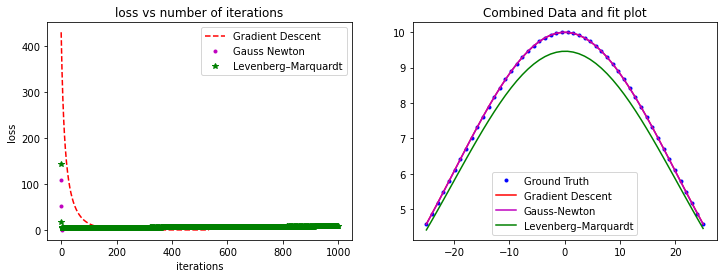


 tolerance  0.01
Gradient Descent converged at iteration  437
loss: 0.00983855224832958
a_est: 9.983879338286183  m_est: 0.0003810694168602857  s_est: 20.089773728976823
Gauss Newton converges at iteration  3
loss: 6.229699393620347e-05
a_est: 9.998337196905194  m_est: 0.002102935591206556  s_est: 20.00402659090192
The Levenberg–Marquardt Algorithm didn't converge in  999  iterations for given parameters of tolerance 0.01  learning rate 0.0
loss: 7.811842456173288
a_est: 9.460748119307151  m_est: 0.07657392773289515  s_est: 20.316097547323277


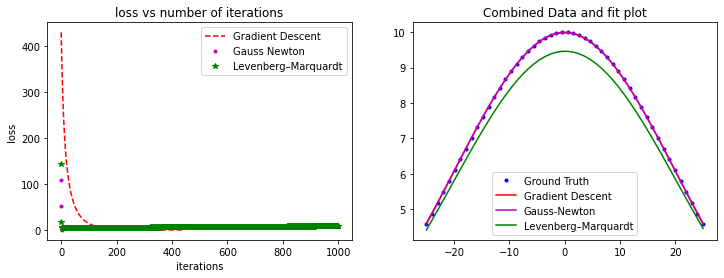


 tolerance  0.1
Gradient Descent converged at iteration  337
loss: 0.09899244775254672
a_est: 9.948877534392215  m_est: 0.006139702817200705  s_est: 20.288135634862776
Gauss Newton converges at iteration  3
loss: 6.229699393620347e-05
a_est: 9.998337196905194  m_est: 0.002102935591206556  s_est: 20.00402659090192
The Levenberg–Marquardt Algorithm didn't converge in  999  iterations for given parameters of tolerance 0.1  learning rate 0.0
loss: 7.811842456173288
a_est: 9.460748119307151  m_est: 0.07657392773289515  s_est: 20.316097547323277


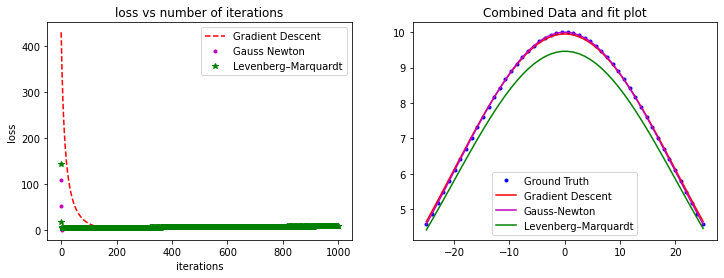


 tolerance  1.0
Gradient Descent converged at iteration  229
loss: 0.9871879843820822
a_est: 9.840596816487373  m_est: 0.10601728929519547  s_est: 20.93342186690136
Gauss Newton converges at iteration  2
loss: 0.9331254378985017
a_est: 9.88531666444999  m_est: -0.36198719732811213  s_est: 19.907238165300324
The Levenberg–Marquardt Algorithm didn't converge in  999  iterations for given parameters of tolerance 1.0  learning rate 0.0
loss: 7.811842456173288
a_est: 9.460748119307151  m_est: 0.07657392773289515  s_est: 20.316097547323277


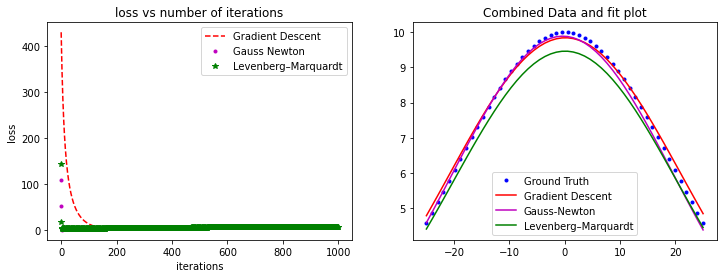


 tolerance  10.0
Gradient Descent converged at iteration  115
loss: 9.829260268328731
a_est: 9.608692938123435  m_est: 1.4171677571178727  s_est: 22.522468934557253
Gauss Newton converges at iteration  2
loss: 0.9331254378985017
a_est: 9.88531666444999  m_est: -0.36198719732811213  s_est: 19.907238165300324
Levenberg–Marquardt converges at iteration  2
loss: 5.730362110598665
a_est: 10.254077061575403  m_est: -1.0498505979479578  s_est: 18.798688886556167


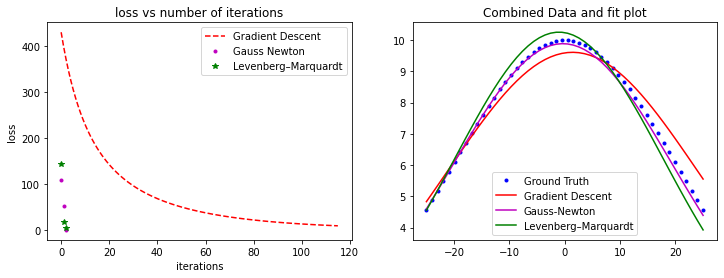


 tolerance  100.0
Gradient Descent converged at iteration  30
loss: 96.50726091112924
a_est: 9.640735602761751  m_est: 6.91689953829249  s_est: 22.826981339510326
Gauss Newton converges at iteration  1
loss: 52.36132656683978
a_est: 9.855255737881372  m_est: -2.4823688211532247  s_est: 17.191041633602573
Levenberg–Marquardt converges at iteration  1
loss: 17.75304170370217
a_est: 9.259792284703648  m_est: 1.6736784343233468  s_est: 23.874714922894466


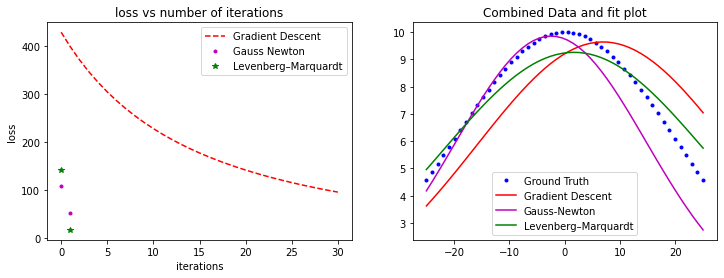

In [8]:

numberOfObservations = 50
xObserved = np.linspace(-25, 25, numberOfObservations)
a_gt = 10
m_gt = 0
s_gt = 20
a_est = 10
m_est = 13
s_est = 19.12
yObserved = gaussian(xObserved, a_gt, m_gt, s_gt)
calculatedPrameters = np.array([a_est, m_est, s_est])
tolerance = np.array([1e-3,1e-2,1e-1,1,1e+1,1e+2])
for tol in tolerance:
    print("\n tolerance ",tol)
    ygd,lgd = gradDescent(xObserved,yObserved,calculatedPrameters,0.01,tol)
    ygn,lgn = gaussNewton(xObserved,yObserved,calculatedPrameters,0.01,tol)
    ylm,llm= LM(xObserved,yObserved,calculatedPrameters,10,tol)
    combinedplot(xObserved,yObserved,ygd,lgd,ygn,lgn,ylm,llm)


## Different initial estimate: Can a particular algorithm handle if the initial estimate is too far from GT?
Yes, the Gauss newton algorithm converges for initial estimates which are relatively far from the Ground Truth.

for a_est: 20.0  m_est: 13.0  s_est: 19.2
Gradient Descent converged at iteration  401
loss: 0.009796680630617503
a_est: 9.983914372250908  m_est: 0.0006691704240702463  s_est: 20.08957755979924
Gauss Newton converges at iteration  3
loss: 0.000299813684922257
a_est: 9.997568405154453  m_est: -0.007860524973484884  s_est: 20.003165014529056
The Levenberg–Marquardt Algorithm didn't converge in  999  iterations for given parameters of tolerance 10.0  learning rate 0.0
loss: 3226.751578935846
a_est: -6.9435434424921615e+22  m_est: 2.4429584509524714e+23  s_est: -2.195830500915328e+22


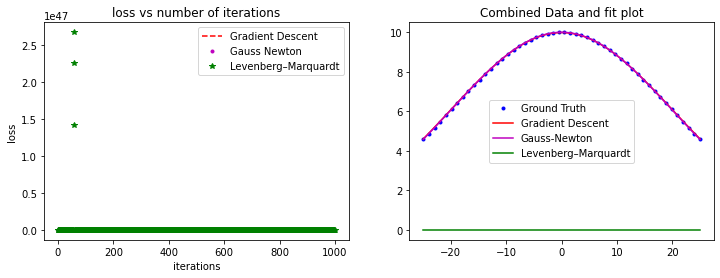

for a_est: 15.0  m_est: 15.0  s_est: 30.0
Gradient Descent converged at iteration  890
loss: 0.009864920462375382
a_est: 9.983857418338392  m_est: 1.4524153694149432e-05  s_est: 20.089896470068705
Gauss Newton converges at iteration  2
loss: 0.004347443763877181
a_est: 9.984687614860787  m_est: -0.0008925681619234016  s_est: 20.031617130516278
The Levenberg–Marquardt Algorithm didn't converge in  999  iterations for given parameters of tolerance 10.0  learning rate 0.0
loss: 778.8360125112522
a_est: 14.940233890569091  m_est: 0.01682161794424439  s_est: 19.895317484422023


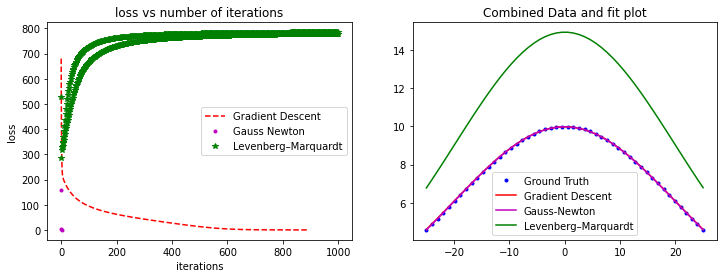

for a_est: 0.0  m_est: 5.0  s_est: 30.0
Gradient Descent converged at iteration  657
loss: 0.009952980128885996
a_est: 9.983785522880186  m_est: 2.0620867812463206e-05  s_est: 20.090299064355474
Gauss Newton converges at iteration  4
loss: 8.389378771688895e-06
a_est: 9.999896348612031  m_est: -0.0009580232171931269  s_est: 19.998668017574058
The Levenberg–Marquardt Algorithm didn't converge in  999  iterations for given parameters of tolerance 10.0  learning rate 0.0
loss: 508.0391570520965
a_est: 6.024074727866969  m_est: 0.01860890067172212  s_est: 20.07619731955487


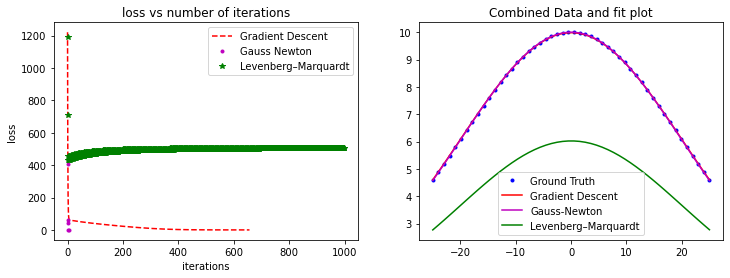

for a_est: 10.0  m_est: 5.0  s_est: 45.0
gradient descent algorithm didn't converge in  999  iterations for given parameters of tolerance 0.01  learning rate 0.01
loss: 38.18849619500227
a_est: 8.969901434120136  m_est: 0.12338061041094336  s_est: 28.942726366387507
Gauss Newton converges at iteration  4
loss: 2.8551279852934357e-06
a_est: 9.999949564582622  m_est: -0.000549485613638781  s_est: -19.99918552898828
The Levenberg–Marquardt Algorithm didn't converge in  999  iterations for given parameters of tolerance 10.0  learning rate 0.0
loss: 142.58132454639758
a_est: 12.124475022969786  m_est: 0.0012237737136526969  s_est: 19.893765650234947


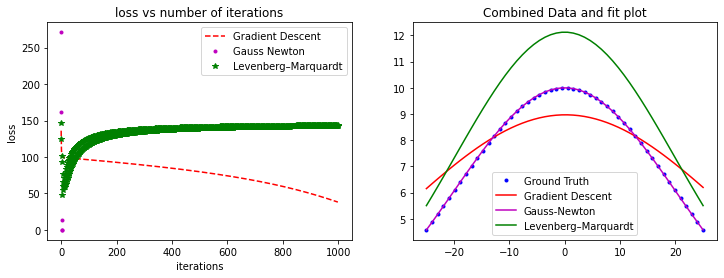

In [9]:
numberOfObservations = 50
xObserved = np.linspace(-25, 25, numberOfObservations)
a_gt = 10
m_gt = 0
s_gt = 20
yObserved = gaussian(xObserved, a_gt, m_gt, s_gt)
ests = np.array([[20,13,19.2],[15,15,30],[0,5,30],[10,5,45]])
for calculatedPrameters in ests:
    print("for a_est:",calculatedPrameters[0]," m_est:",calculatedPrameters[1], " s_est:",calculatedPrameters[2])
    ygd,lgd = gradDescent(xObserved,yObserved,calculatedPrameters,0.01,1e-2)
    ygn,lgn = gaussNewton(xObserved,yObserved,calculatedPrameters,0.01,1e-2)
    ylm,llm= LM(xObserved,yObserved,calculatedPrameters,10,1e+1)
    combinedplot(xObserved,yObserved,ygd,lgd,ygn,lgn,ylm,llm)


Observation: Gauss newton is able to handle really far off estimates well, Gradient descent too handles those estimates to some extent. But LM is not able to handle far off estimations <br>
Note: the first graph seems to be shooting out of scale just because the LM algorithm hasn't converged and thus overshot to large values. The Gradient Descent and Gauss Newton algorithms converge.

## Different number of observations: Can a particular algorithm handle very less observations?
Amongst the three, the LM and Gauss Newton algorithms can handle a --relatively-- low number of observations whereas Gradient Descent needs a --relatively-- large number of observations.

for 3 observations
gradient descent algorithm didn't converge in  999  iterations for given parameters of tolerance 0.01  learning rate 0.01
loss: 12.810563193203759
a_est: 7.294684254352  m_est: 4.297665940094786  s_est: 43.592465589006416
Gauss Newton converges at iteration  3
loss: 6.392625656043453e-05
a_est: 9.998244588638427  m_est: -0.0036187727889811505  s_est: -19.98710431578631
Levenberg–Marquardt converges at iteration  3
loss: 5.8713982825295865
a_est: 7.912261994938874  m_est: -0.5284501715846743  s_est: 28.89854552453879


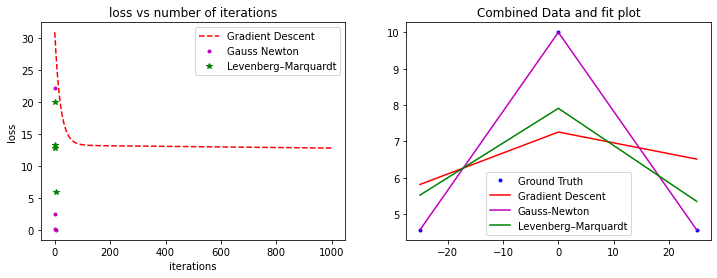

for 5 observations
gradient descent algorithm didn't converge in  999  iterations for given parameters of tolerance 0.01  learning rate 0.01
loss: 14.53206008502124
a_est: 7.863127904599456  m_est: 3.9810583385192375  s_est: 43.30548274504767
Gauss Newton converges at iteration  3
loss: 0.0070155988244037714
a_est: 9.982448276627636  m_est: 0.03373519885723952  s_est: -19.892406162819146
Levenberg–Marquardt converges at iteration  3
loss: 5.217692398340133
a_est: 8.315350470432676  m_est: -1.4110666938617307  s_est: 25.4091574580058


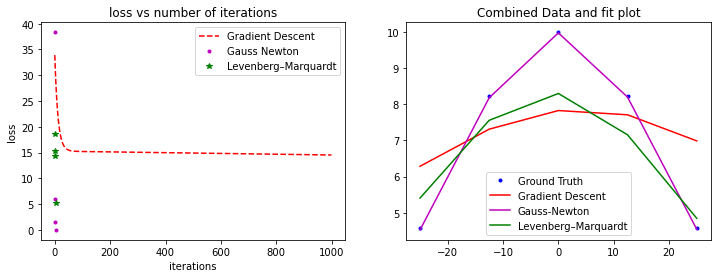

for 8 observations
gradient descent algorithm didn't converge in  999  iterations for given parameters of tolerance 0.01  learning rate 0.01
loss: 19.18183621802356
a_est: 8.117930289445017  m_est: 3.5315582026017753  s_est: 42.717970130675575
Gauss Newton converges at iteration  3
loss: 0.0077302806827764395
a_est: 9.988577199087958  m_est: -0.030128415358789074  s_est: -19.89809957757157
The Levenberg–Marquardt Algorithm didn't converge in  999  iterations for given parameters of tolerance 10.0  learning rate 0.0
loss: 40.47084650190208
a_est: 7.068858858958945  m_est: -0.017535438170335593  s_est: 20.108291865673714


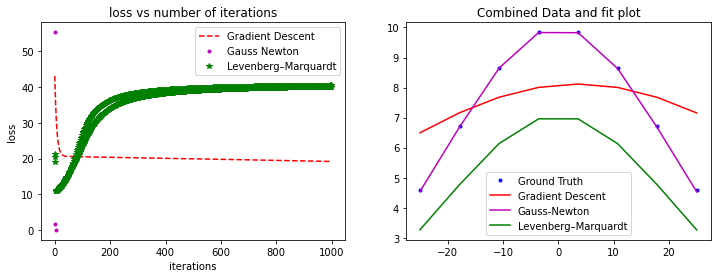

for 10 observations
gradient descent algorithm didn't converge in  999  iterations for given parameters of tolerance 0.01  learning rate 0.01
loss: 22.26011891799478
a_est: 8.199698846827218  m_est: 3.2481737193264504  s_est: 42.29147012641224
Gauss Newton converges at iteration  3
loss: 0.00786459119096223
a_est: 9.985447214572805  m_est: -0.05710307896642841  s_est: -19.93203448923023
Levenberg–Marquardt converges at iteration  34
loss: 9.616738605368425
a_est: 10.148694738654903  m_est: 1.6299933236885857  s_est: 24.564089268726534


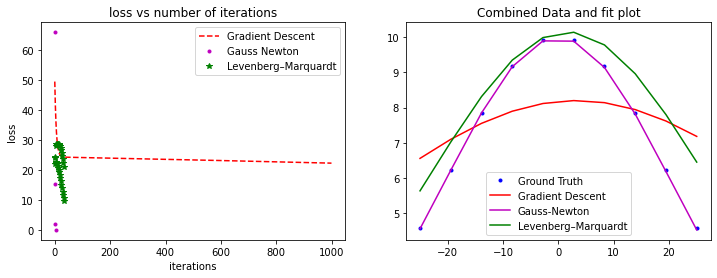

for 12 observations
gradient descent algorithm didn't converge in  999  iterations for given parameters of tolerance 0.01  learning rate 0.01
loss: 25.24847203960771
a_est: 8.256100462938628  m_est: 2.977366620428282  s_est: 41.84363531919719
Gauss Newton converges at iteration  3
loss: 0.008471865756035276
a_est: 9.98075694969458  m_est: -0.06882382598615511  s_est: -19.966465184641056
Levenberg–Marquardt converges at iteration  18
loss: 9.093464095359423
a_est: 9.830295820931154  m_est: 1.148283748311746  s_est: 25.362710491137953


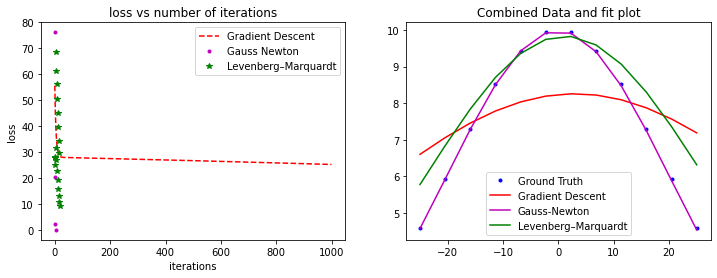

for 15 observations
gradient descent algorithm didn't converge in  999  iterations for given parameters of tolerance 0.01  learning rate 0.01
loss: 29.515258706353507
a_est: 8.317735304141657  m_est: 2.594417590382066  s_est: 41.134968118113896
Gauss Newton converges at iteration  3
loss: 0.009719032635457953
a_est: 9.974072170598296  m_est: -0.06938762605330862  s_est: -20.008381454161505
Levenberg–Marquardt converges at iteration  12
loss: 8.598591578616553
a_est: 9.112304672452595  m_est: 0.6918892259159876  s_est: 26.43441807026739


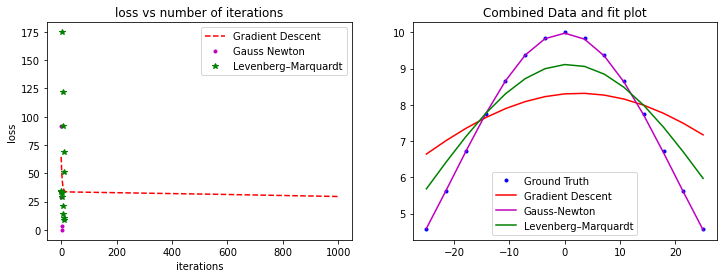

for 20 observations
gradient descent algorithm didn't converge in  999  iterations for given parameters of tolerance 0.01  learning rate 0.01
loss: 35.93130132069082
a_est: 8.394526490914519  m_est: 2.0174636595620563  s_est: 39.856855411409036
Gauss Newton converges at iteration  4
loss: 2.3857578173174504e-07
a_est: 9.999961027966563  m_est: 0.00033668476813428216  s_est: -19.99976952720658
The Levenberg–Marquardt Algorithm didn't converge in  999  iterations for given parameters of tolerance 10.0  learning rate 0.0
loss: 48.76667026446152
a_est: 11.990197713853064  m_est: -0.0011228142699538021  s_est: 19.882866320847466


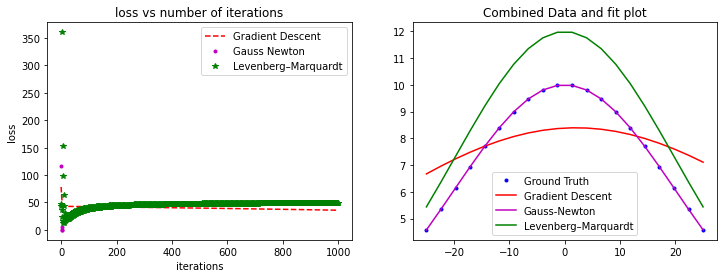

for 22 observations
gradient descent algorithm didn't converge in  999  iterations for given parameters of tolerance 0.01  learning rate 0.01
loss: 38.21412956776219
a_est: 8.421676611465672  m_est: 1.8079653522095283  s_est: 39.31062904290413
Gauss Newton converges at iteration  4
loss: 3.271145691785934e-07
a_est: 9.999969172763976  m_est: 0.0003167783836811183  s_est: -19.999638954474374
The Levenberg–Marquardt Algorithm didn't converge in  999  iterations for given parameters of tolerance 10.0  learning rate 0.0
loss: 63.92661242414641
a_est: 12.165154462251298  m_est: -0.0008433810949340145  s_est: 19.891086129155987


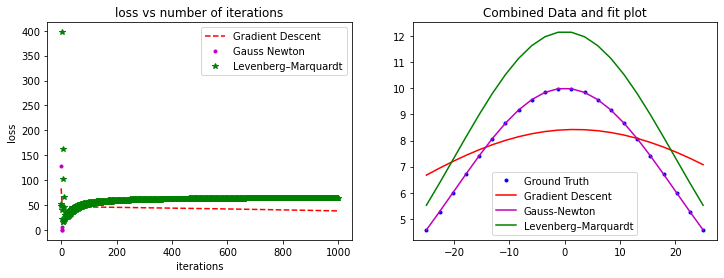

for 25 observations
gradient descent algorithm didn't converge in  999  iterations for given parameters of tolerance 0.01  learning rate 0.01
loss: 41.285518445649984
a_est: 8.46153090267852  m_est: 1.5164068052808461  s_est: 38.45169482685636
Gauss Newton converges at iteration  4
loss: 4.738859213669028e-07
a_est: 9.999978227404668  m_est: 0.00024522361793435574  s_est: -19.9994749139841
The Levenberg–Marquardt Algorithm didn't converge in  999  iterations for given parameters of tolerance 10.0  learning rate 0.0
loss: 88.74197840081784
a_est: 12.384270792058285  m_est: -0.0006530791605547648  s_est: 19.899582383478158


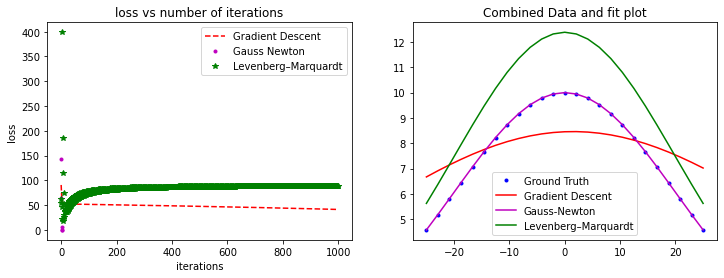

for 28 observations
gradient descent algorithm didn't converge in  999  iterations for given parameters of tolerance 0.01  learning rate 0.01
loss: 43.876586797733545
a_est: 8.502077473135923  m_est: 1.2520033545850304  s_est: 37.542498492396334
Gauss Newton converges at iteration  4
loss: 6.428596659169266e-07
a_est: 9.999983193463462  m_est: 0.0001465431171418334  s_est: -19.999352332616247
The Levenberg–Marquardt Algorithm didn't converge in  999  iterations for given parameters of tolerance 10.0  learning rate 0.0
loss: 105.76292381251885
a_est: 12.454453079219949  m_est: -0.0005900115149403799  s_est: 19.9022858974239


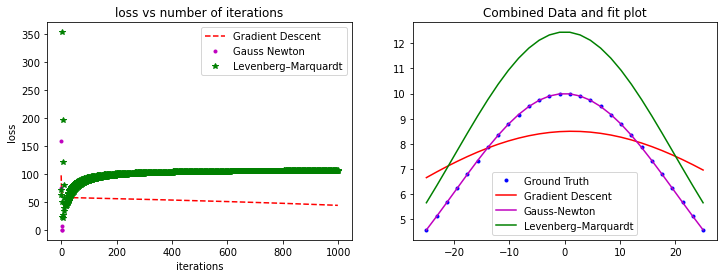

for 30 observations
gradient descent algorithm didn't converge in  999  iterations for given parameters of tolerance 0.01  learning rate 0.01
loss: 45.299966848650435
a_est: 8.530266296186623  m_est: 1.090785769990237  s_est: 36.90664480855761
Gauss Newton converges at iteration  4
loss: 7.713311244321944e-07
a_est: 9.99998444551141  m_est: 7.426136720036641e-05  s_est: -19.999291517644988
The Levenberg–Marquardt Algorithm didn't converge in  999  iterations for given parameters of tolerance 10.0  learning rate 0.0
loss: 105.83242537286728
a_est: 12.370986976231713  m_est: -0.0005846138086811441  s_est: 19.90008267693206


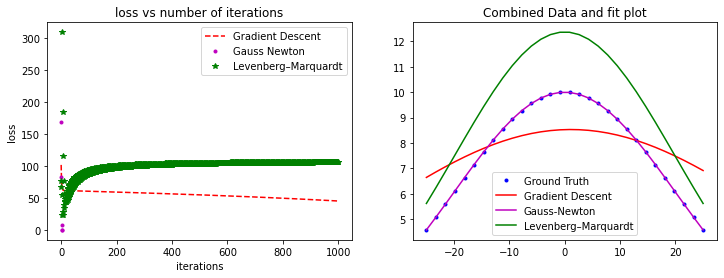

for 34 observations
gradient descent algorithm didn't converge in  999  iterations for given parameters of tolerance 0.01  learning rate 0.01
loss: 47.29486102353521
a_est: 8.591279251813111  m_est: 0.8043533049612996  s_est: 35.55793038241766
Gauss Newton converges at iteration  4
loss: 1.0725231352600142e-06
a_est: 9.999982960979157  m_est: -7.247512050717435e-05  s_est: -19.9992106865635
The Levenberg–Marquardt Algorithm didn't converge in  999  iterations for given parameters of tolerance 10.0  learning rate 0.0
loss: 97.34834487508991
a_est: 12.136317279506475  m_est: -0.0005181664412890735  s_est: 19.892425751934734


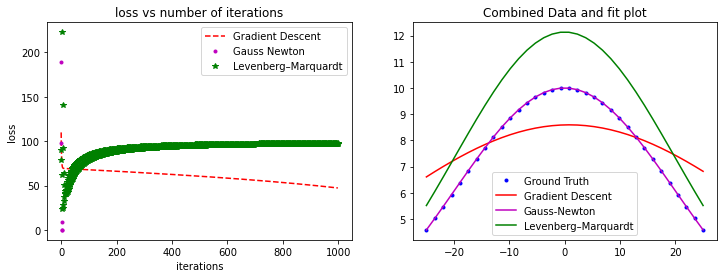

for 38 observations
gradient descent algorithm didn't converge in  999  iterations for given parameters of tolerance 0.01  learning rate 0.01
loss: 47.93054358865528
a_est: 8.661296291104819  m_est: 0.5656008398820976  s_est: 34.09708386814903
Gauss Newton converges at iteration  4
loss: 1.4356588270651757e-06
a_est: 9.999977541954916  m_est: -0.00021181467977287802  s_est: -19.999170911885173
The Levenberg–Marquardt Algorithm didn't converge in  999  iterations for given parameters of tolerance 10.0  learning rate 0.0
loss: 95.58628984460854
a_est: 12.002343717923491  m_est: -0.0002870207011509418  s_est: 19.88741567728353


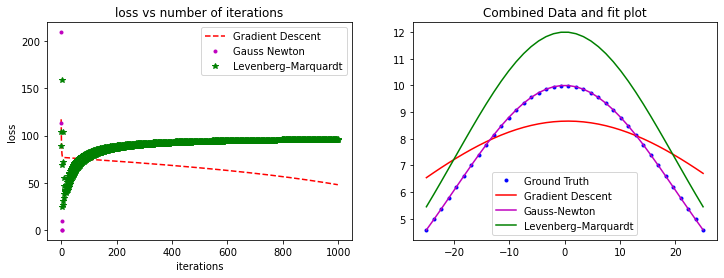

for 42 observations
gradient descent algorithm didn't converge in  999  iterations for given parameters of tolerance 0.01  learning rate 0.01
loss: 46.87860661320902
a_est: 8.744238877947652  m_est: 0.37375975239802733  s_est: 32.512315067848256
Gauss Newton converges at iteration  4
loss: 1.8582212141455318e-06
a_est: 9.999969554277271  m_est: -0.00033833304613417603  s_est: -19.999159234519464
The Levenberg–Marquardt Algorithm didn't converge in  999  iterations for given parameters of tolerance 10.0  learning rate 0.0
loss: 102.28346140318831
a_est: 11.968917003590393  m_est: 0.00011458158562433754  s_est: 19.886452258848838


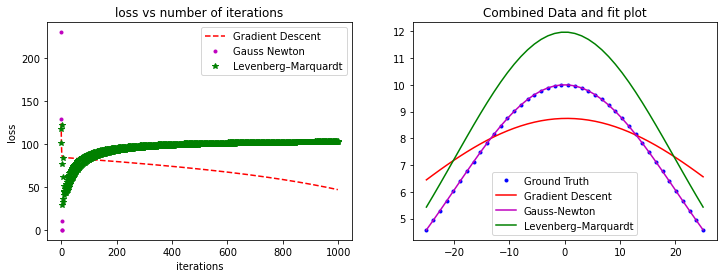

for 48 observations
gradient descent algorithm didn't converge in  999  iterations for given parameters of tolerance 0.01  learning rate 0.01
loss: 41.293104317267925
a_est: 8.904053626290896  m_est: 0.17026400206845044  s_est: 29.88431603467249
Gauss Newton converges at iteration  4
loss: 2.589302461919011e-06
a_est: 9.999954855966209  m_est: -0.000501733335743354  s_est: -19.999174698425204
The Levenberg–Marquardt Algorithm didn't converge in  999  iterations for given parameters of tolerance 10.0  learning rate 0.0
loss: 130.64947316303085
a_est: 12.077051039066808  m_est: 0.0009265211002982485  s_est: 19.891725794634773


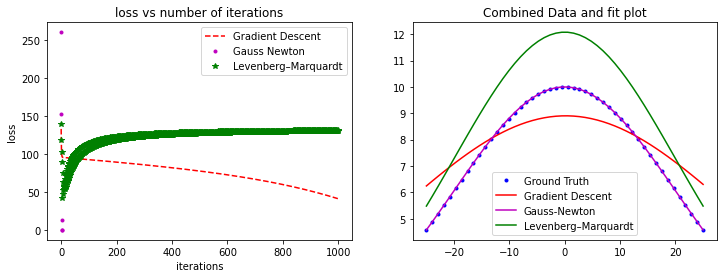

for 50 observations
gradient descent algorithm didn't converge in  999  iterations for given parameters of tolerance 0.01  learning rate 0.01
loss: 38.18849619500227
a_est: 8.969901434120136  m_est: 0.12338061041094336  s_est: 28.942726366387507
Gauss Newton converges at iteration  4
loss: 2.8551279852934357e-06
a_est: 9.999949564582622  m_est: -0.000549485613638781  s_est: -19.99918552898828
The Levenberg–Marquardt Algorithm didn't converge in  999  iterations for given parameters of tolerance 10.0  learning rate 0.0
loss: 142.58132454639758
a_est: 12.124475022969786  m_est: 0.0012237737136526969  s_est: 19.893765650234947


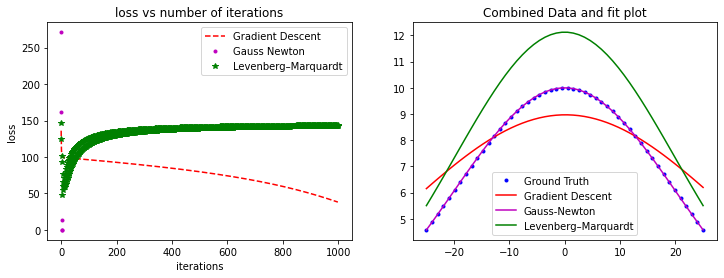

for 52 observations
gradient descent algorithm didn't converge in  999  iterations for given parameters of tolerance 0.01  learning rate 0.01
loss: 34.43698701348161
a_est: 9.043410858677065  m_est: 0.0859754275313151  s_est: 27.973660362755737
Gauss Newton converges at iteration  4
loss: 3.1304622226266806e-06
a_est: 9.999944175140818  m_est: -0.0005941448320681483  s_est: -19.999198271901065
The Levenberg–Marquardt Algorithm didn't converge in  999  iterations for given parameters of tolerance 10.0  learning rate 0.0
loss: 155.74258959139087
a_est: 12.175747924838882  m_est: 0.001522734797743154  s_est: 19.895836904040348


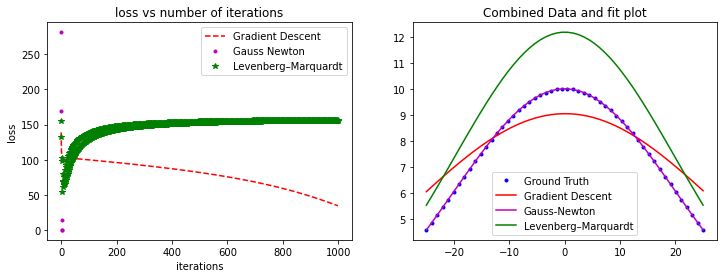

for 55 observations
gradient descent algorithm didn't converge in  999  iterations for given parameters of tolerance 0.01  learning rate 0.01
loss: 27.71875507100178
a_est: 9.169260586618673  m_est: 0.04575614188898691  s_est: 26.487065555748035
Gauss Newton converges at iteration  4
loss: 3.5594098808815576e-06
a_est: 9.999935998972074  m_est: -0.0006557349331455034  s_est: -19.999220089665425
The Levenberg–Marquardt Algorithm didn't converge in  999  iterations for given parameters of tolerance 10.0  learning rate 0.0
loss: 177.17331316917657
a_est: 12.254298510794401  m_est: 0.001968727679332819  s_est: 19.898785120126497


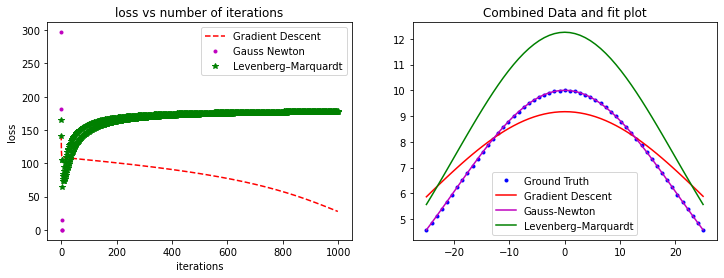

for 60 observations
gradient descent algorithm didn't converge in  999  iterations for given parameters of tolerance 0.01  learning rate 0.01
loss: 15.147841436374154
a_est: 9.41667327868468  m_est: 0.011788756117457264  s_est: 24.06118709720934
Gauss Newton converges at iteration  4
loss: 4.310422796194018e-06
a_est: 9.999922384172322  m_est: -0.0007455152165136564  s_est: -19.999261131884314
The Levenberg–Marquardt Algorithm didn't converge in  999  iterations for given parameters of tolerance 10.0  learning rate 0.0
loss: 214.84897778617534
a_est: 12.373651589522815  m_est: 0.0027151104151641667  s_est: 19.90282735438526


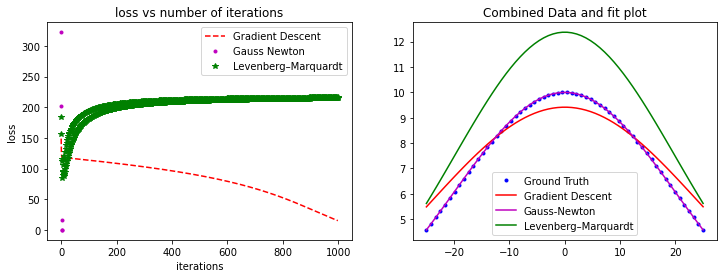

In [10]:
numberOfObservations = np.array([3,5,8,10,12,15,20,22,25,28,30,34,38,42,48,50,52,55,60])
a_gt = 10
m_gt = 0
s_gt = 50
for o in numberOfObservations:
    xObserved = np.linspace(-25, 25, o)
    a_gt = 10
    m_gt = 0
    s_gt = 20
    yObserved = gaussian(xObserved, a_gt, m_gt, s_gt)
    print("for", o,"observations")
    ygd,lgd = gradDescent(xObserved,yObserved,calculatedPrameters,0.01,1e-2)
    ygn,lgn = gaussNewton(xObserved,yObserved,calculatedPrameters,0.01,1e-2)
    ylm,llm= LM(xObserved,yObserved,calculatedPrameters,10,1e+1)
    combinedplot(xObserved,yObserved,ygd,lgd,ygn,lgn,ylm,llm)

## Add noise to your observations: Can a particular algorithm handle large noise?
Gauss newton can handle noisy data better than the other two.

for * 0.0001  noise
gradient descent algorithm didn't converge in  999  iterations for given parameters of tolerance 0.01  learning rate 0.01
loss: 38.18475959269207
a_est: 8.970192137316293  m_est: 0.12242128859189004  s_est: 28.941140361164365
Gauss Newton converges at iteration  4
loss: 5.3883264155465424e-05
a_est: 10.000188962859417  m_est: -0.0009897167660156206  s_est: -19.99897341798579
The Levenberg–Marquardt Algorithm didn't converge in  999  iterations for given parameters of tolerance 10.0  learning rate 0.0
loss: 142.5436939811161
a_est: 12.124407728702032  m_est: 0.000393719383151565  s_est: 19.893732452956474


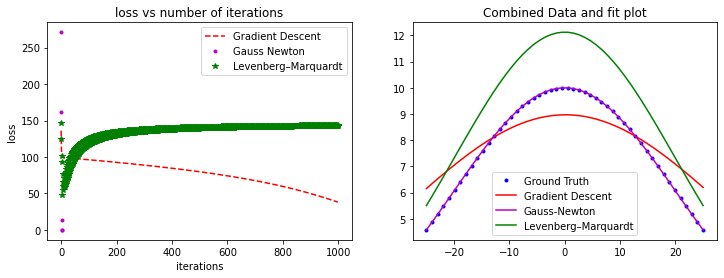

for * 0.0002  noise
gradient descent algorithm didn't converge in  999  iterations for given parameters of tolerance 0.01  learning rate 0.01
loss: 38.20278211549113
a_est: 8.96899191916672  m_est: 0.12374386048306325  s_est: 28.95208403264053
Gauss Newton converges at iteration  4
loss: 0.00018243431461270284
a_est: 9.99924829492714  m_est: -0.0007165896029568061  s_est: -20.001397661421827
The Levenberg–Marquardt Algorithm didn't converge in  999  iterations for given parameters of tolerance 10.0  learning rate 0.0
loss: 142.1594493936049
a_est: 12.120296200319492  m_est: 0.0042979896380403535  s_est: 19.897246205192303


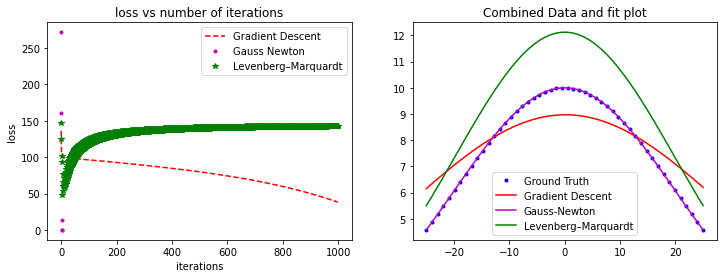

for * 0.001  noise
gradient descent algorithm didn't converge in  999  iterations for given parameters of tolerance 0.01  learning rate 0.01
loss: 38.2161421179115
a_est: 8.967485055854693  m_est: 0.13201243648710353  s_est: 28.96812772719044
Gauss Newton converges at iteration  4
loss: 0.005917772117159662
a_est: 9.997766122601815  m_est: 0.0036185105855125327  s_est: -20.00693393809322
The Levenberg–Marquardt Algorithm didn't converge in  999  iterations for given parameters of tolerance 10.0  learning rate 0.0
loss: 143.44893128968826
a_est: 12.129542277667337  m_est: 0.003112769690341006  s_est: 19.89576770861692


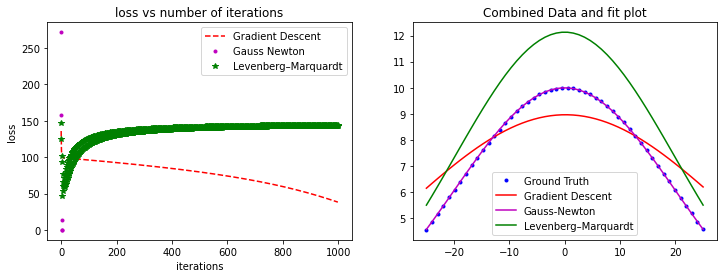

for * 0.002  noise
gradient descent algorithm didn't converge in  999  iterations for given parameters of tolerance 0.01  learning rate 0.01
loss: 38.258984021565354
a_est: 8.964625069839167  m_est: 0.11902573428482621  s_est: 29.029708737583576
Gauss Newton Algorithm didn't converge in  999  iterations for given parameters of tolerance 0.01  learning rate 0.01
loss: 0.016976426065400018
a_est: 9.995300523217745  m_est: -0.005050317193792796  s_est: -20.029324880206193
The Levenberg–Marquardt Algorithm didn't converge in  999  iterations for given parameters of tolerance 10.0  learning rate 0.0
loss: 144.13357411446097
a_est: 12.133220929760302  m_est: 0.017458750496752287  s_est: 19.907381326725872


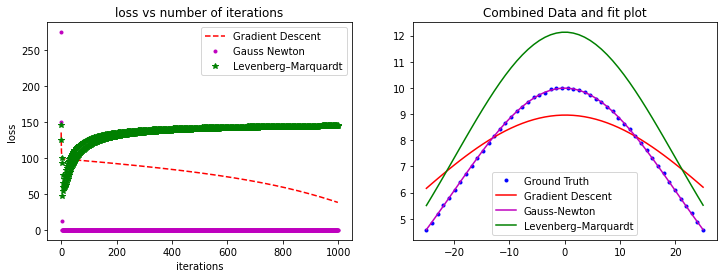

for * 0.01  noise
gradient descent algorithm didn't converge in  999  iterations for given parameters of tolerance 0.01  learning rate 0.01
loss: 38.85733366872567
a_est: 8.959212440161462  m_est: 0.09711562261719227  s_est: 29.288912522525266
Gauss Newton Algorithm didn't converge in  999  iterations for given parameters of tolerance 0.01  learning rate 0.01
loss: 0.6436394970168935
a_est: 9.989366587275644  m_est: 0.00679428675105033  s_est: -20.133126740200716
The Levenberg–Marquardt Algorithm didn't converge in  999  iterations for given parameters of tolerance 10.0  learning rate 0.0
loss: 215.58032002107916
a_est: 12.663059041522986  m_est: -0.23159523936219395  s_est: 19.674074981110294


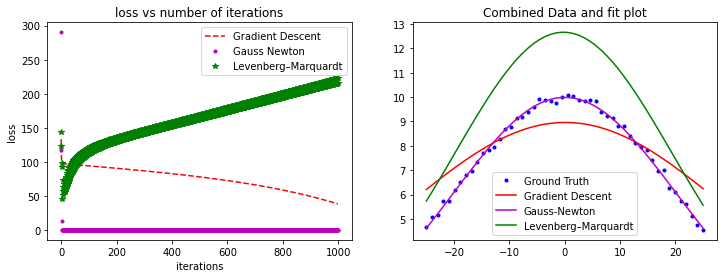

In [11]:
noise_arr = [1/10000,1/5000,1/1000,1/500,1/100]
o = 50
for n in noise_arr:
    xObserved = np.linspace(-25, 25, o)
    a_gt = 10
    m_gt = 0
    s_gt = 20
    yObserved = gaussian(xObserved, a_gt, m_gt, s_gt)+np.random.normal(0,a_gt*n,o)
    print("for *", n," noise")
    ygd,lgd = gradDescent(xObserved,yObserved,calculatedPrameters,0.01,1e-2)
    ygn,lgn = gaussNewton(xObserved,yObserved,calculatedPrameters,0.01,1e-2)
    ylm,llm= LM(xObserved,yObserved,calculatedPrameters,10,1e+1)
    combinedplot(xObserved,yObserved,ygd,lgd,ygn,lgn,ylm,llm)
    

For higher levels of white noise , none converge. For low and medium noise only Gauss Newton converges, given learning rate and tolerance kept fixed for convergence on initial conditions of no noise.

## Different Learning rates

gradient descent algorithm didn't converge in  999  iterations for given parameters of tolerance 0.1  learning rate 0.0001
loss: 244.48737461270264
a_est: 9.918497561085035  m_est: 10.42188691583679  s_est: 21.134393038947387
Gauss Newton converges at iteration  3
loss: 6.229699393620347e-05
a_est: 9.998337196905194  m_est: 0.002102935591206556  s_est: 20.00402659090192
The Levenberg–Marquardt Algorithm didn't converge in  999  iterations for given parameters of tolerance 0.1  learning rate 0.0
loss: 3226.679398346162
a_est: -4186.371497992811  m_est: 65155.079026372936  s_est: 4374.725909473835


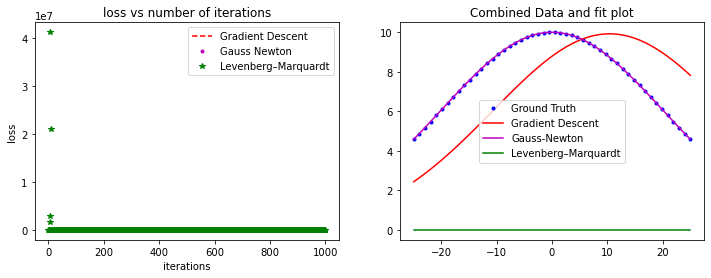

gradient descent algorithm didn't converge in  999  iterations for given parameters of tolerance 0.1  learning rate 0.001
loss: 14.123791568974372
a_est: 9.582518592742808  m_est: 1.9573486106891116  s_est: 22.74004930353681
Gauss Newton converges at iteration  3
loss: 6.229699393620347e-05
a_est: 9.998337196905194  m_est: 0.002102935591206556  s_est: 20.00402659090192
The Levenberg–Marquardt Algorithm didn't converge in  999  iterations for given parameters of tolerance 0.1  learning rate 0.0
loss: 13939332875.471117
a_est: 16906.24852280937  m_est: 266504.66156124155  s_est: -1720966.936794684


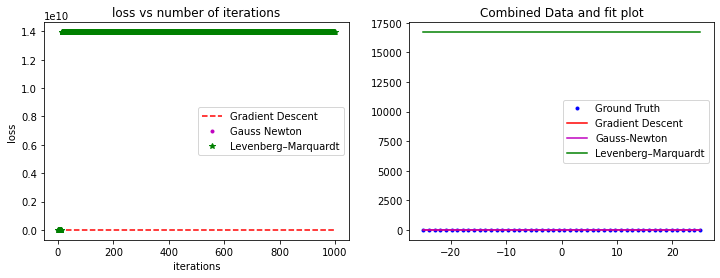

Gradient Descent converged at iteration  337
loss: 0.09899244775254672
a_est: 9.948877534392215  m_est: 0.006139702817200705  s_est: 20.288135634862776
Gauss Newton converges at iteration  3
loss: 6.229699393620347e-05
a_est: 9.998337196905194  m_est: 0.002102935591206556  s_est: 20.00402659090192
The Levenberg–Marquardt Algorithm didn't converge in  999  iterations for given parameters of tolerance 0.1  learning rate 0.0
loss: 3226.679398346162
a_est: -52.6157167578999  m_est: 120.26337222770415  s_est: 6.272041173978692


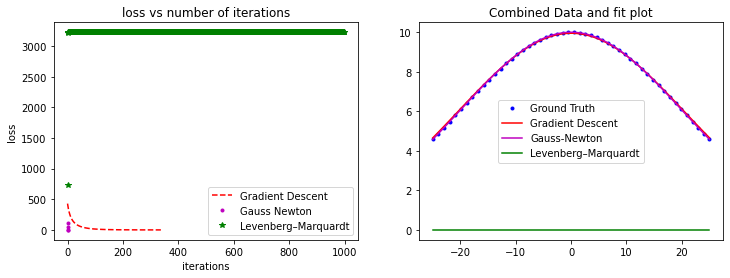

gradient descent algorithm didn't converge in  999  iterations for given parameters of tolerance 0.1  learning rate 0.1
loss: 3226.679414252767
a_est: -125.51620545318187  m_est: 80.49221057521616  s_est: -9.042245279619415
Gauss Newton converges at iteration  3
loss: 6.229699393620347e-05
a_est: 9.998337196905194  m_est: 0.002102935591206556  s_est: 20.00402659090192
The Levenberg–Marquardt Algorithm didn't converge in  999  iterations for given parameters of tolerance 0.1  learning rate 0.0
loss: 3226.679398346162
a_est: 0.03948740909722631  m_est: -121.32742468714017  s_est: 6.5949103333358465


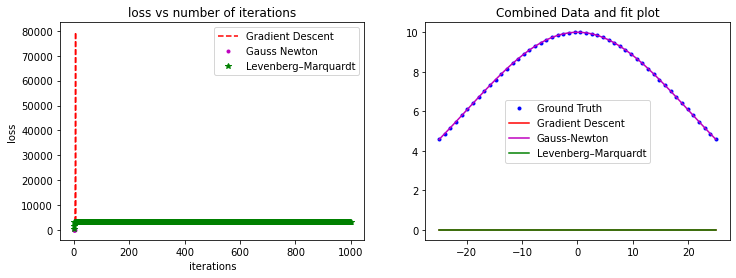

gradient descent algorithm didn't converge in  999  iterations for given parameters of tolerance 0.1  learning rate 1.0
loss: 251.12364291814873
a_est: 440142.66885355505  m_est: -167867.68666039224  s_est: -36167.47894579422
Gauss Newton converges at iteration  3
loss: 6.229699393620347e-05
a_est: 9.998337196905194  m_est: 0.002102935591206556  s_est: 20.00402659090192
The Levenberg–Marquardt Algorithm didn't converge in  999  iterations for given parameters of tolerance 0.1  learning rate 0.0
loss: 40.81843117599025
a_est: 11.160387108987731  m_est: 0.03049739567784374  s_est: 19.81417321630422


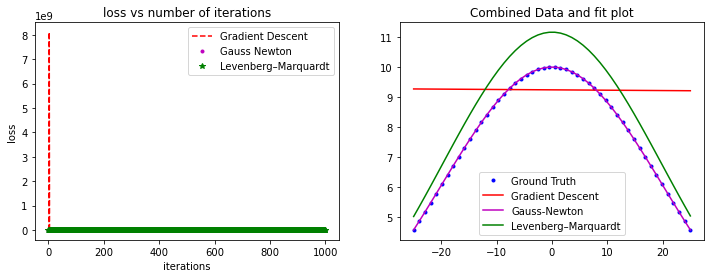

gradient descent algorithm didn't converge in  999  iterations for given parameters of tolerance 0.1  learning rate 2.0
loss: 3226.679398346162
a_est: -285725.2570507009  m_est: -72661.47692430415  s_est: -1907.0478644905234
Gauss Newton converges at iteration  3
loss: 6.229699393620347e-05
a_est: 9.998337196905194  m_est: 0.002102935591206556  s_est: 20.00402659090192
The Levenberg–Marquardt Algorithm didn't converge in  999  iterations for given parameters of tolerance 0.1  learning rate 0.0
loss: 0.30811718193927295
a_est: 10.063082753906595  m_est: -0.27839974789506144  s_est: 19.927657116221713


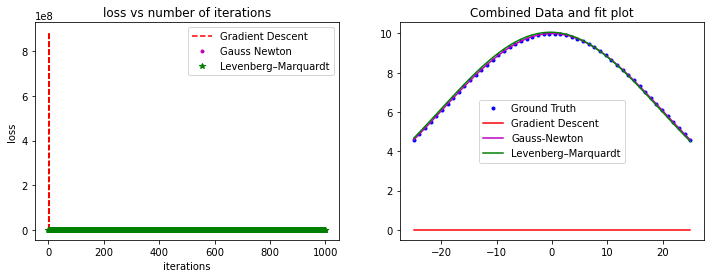

gradient descent algorithm didn't converge in  999  iterations for given parameters of tolerance 0.1  learning rate 3.0
loss: 8.423179077164466e+42
a_est: 3.0266628797201995e+26  m_est: -5.5626608307154726e+25  s_est: -1.070102501920274e+25
Gauss Newton converges at iteration  3
loss: 6.229699393620347e-05
a_est: 9.998337196905194  m_est: 0.002102935591206556  s_est: 20.00402659090192
The Levenberg–Marquardt Algorithm didn't converge in  999  iterations for given parameters of tolerance 0.1  learning rate 0.0
loss: 2.4217202377469396
a_est: 9.671634252334226  m_est: -0.1345169238576496  s_est: 20.415787652137656


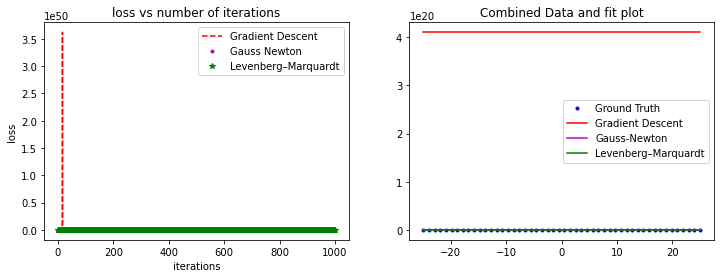

gradient descent algorithm didn't converge in  999  iterations for given parameters of tolerance 0.1  learning rate 4.0
loss: 3226.679398346162
a_est: -5.278964399787951e+22  m_est: -2.728357095189793e+22  s_est: 4.719937221661777e+20
Gauss Newton converges at iteration  3
loss: 6.229699393620347e-05
a_est: 9.998337196905194  m_est: 0.002102935591206556  s_est: 20.00402659090192
The Levenberg–Marquardt Algorithm didn't converge in  999  iterations for given parameters of tolerance 0.1  learning rate 0.0
loss: 3.3610080327710046
a_est: 9.626091944748282  m_est: -0.07760488353772636  s_est: 20.358714140368836


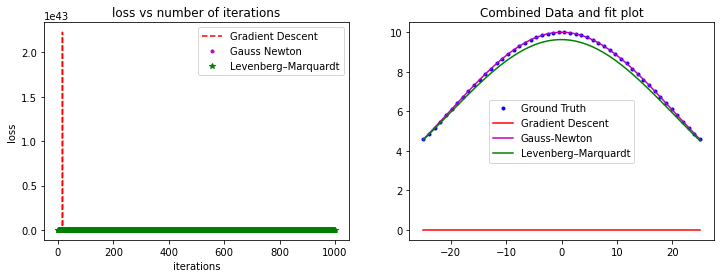

gradient descent algorithm didn't converge in  999  iterations for given parameters of tolerance 0.1  learning rate 5.0
loss: 3226.6793983461585
a_est: 186720.26345227615  m_est: -13284.99955973455  s_est: -1399.004163212634
Gauss Newton converges at iteration  3
loss: 6.229699393620347e-05
a_est: 9.998337196905194  m_est: 0.002102935591206556  s_est: 20.00402659090192
The Levenberg–Marquardt Algorithm didn't converge in  999  iterations for given parameters of tolerance 0.1  learning rate 0.0
loss: 3.2015338288860136
a_est: 9.63539222319094  m_est: -0.04273863185815196  s_est: 20.342711644153216


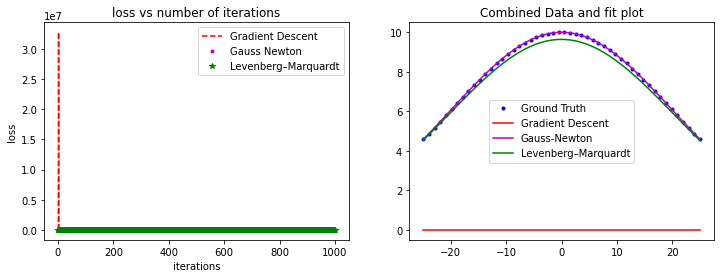

gradient descent algorithm didn't converge in  999  iterations for given parameters of tolerance 0.1  learning rate 8.0
loss: 3226.6793985238173
a_est: -2094.2695584751345  m_est: -436.9266543183346  s_est: 55.275255914070016
Gauss Newton converges at iteration  3
loss: 6.229699393620347e-05
a_est: 9.998337196905194  m_est: 0.002102935591206556  s_est: 20.00402659090192
The Levenberg–Marquardt Algorithm didn't converge in  999  iterations for given parameters of tolerance 0.1  learning rate 0.0
loss: 4.363421004322686
a_est: 9.583616770562244  m_est: 0.058096321716209195  s_est: 20.330897068382143


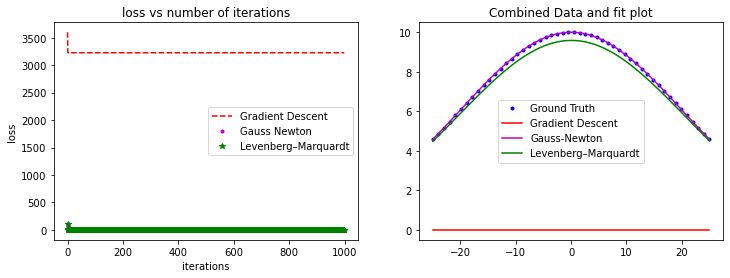

gradient descent algorithm didn't converge in  999  iterations for given parameters of tolerance 0.1  learning rate 10.0
loss: 3226.679398346162
a_est: -3169.1548473035214  m_est: -591.1815735283033  s_est: 16.740048387473166
Gauss Newton converges at iteration  3
loss: 6.229699393620347e-05
a_est: 9.998337196905194  m_est: 0.002102935591206556  s_est: 20.00402659090192
The Levenberg–Marquardt Algorithm didn't converge in  999  iterations for given parameters of tolerance 0.1  learning rate 0.0
loss: 7.811842456173288
a_est: 9.460748119307151  m_est: 0.07657392773289515  s_est: 20.316097547323277


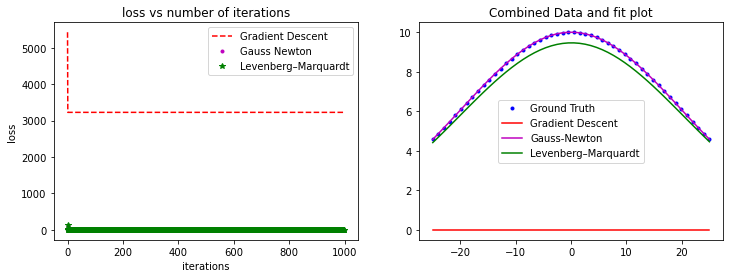

In [12]:
numberOfObservations = 50
xObserved = np.linspace(-25, 25, numberOfObservations)
a_gt = 10
m_gt = 0
s_gt = 20
a_est = 10
m_est = 13
s_est = 19.12
yObserved = gaussian(xObserved, a_gt, m_gt, s_gt)
calculatedPrameters = np.array([a_est, m_est, s_est])
learningrate = np.array([0.0001,0.001,0.01,0.1,1,2,3,4,5,8,10])

for l in learningrate:    
    ygd,lgd = gradDescent(xObserved,yObserved,calculatedPrameters,l,1e-1)
    ygn,lgn = gaussNewton(xObserved,yObserved,calculatedPrameters,l,1e-1)
    ylm,llm= LM(xObserved,yObserved,calculatedPrameters,l,1e-1)
    combinedplot(xObserved,yObserved,ygd,lgd,ygn,lgn,ylm,llm)

**We see LM is not able to converge for a very small tolerance value. Hence we increase the tolerance level and check**

gradient descent algorithm didn't converge in  999  iterations for given parameters of tolerance 10.0  learning rate 0.0001
loss: 244.48737461270264
a_est: 9.918497561085035  m_est: 10.42188691583679  s_est: 21.134393038947387
Gauss Newton converges at iteration  2
loss: 0.9331254378985017
a_est: 9.88531666444999  m_est: -0.36198719732811213  s_est: 19.907238165300324
The Levenberg–Marquardt Algorithm didn't converge in  999  iterations for given parameters of tolerance 10.0  learning rate 0.0
loss: 3226.679398346162
a_est: -4186.371497992811  m_est: 65155.079026372936  s_est: 4374.725909473835


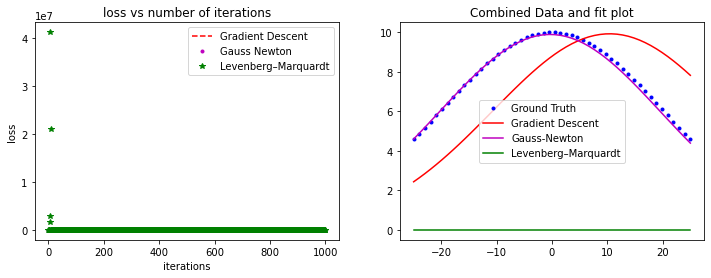

gradient descent algorithm didn't converge in  999  iterations for given parameters of tolerance 10.0  learning rate 0.001
loss: 14.123791568974372
a_est: 9.582518592742808  m_est: 1.9573486106891116  s_est: 22.74004930353681
Gauss Newton converges at iteration  2
loss: 0.9331254378985017
a_est: 9.88531666444999  m_est: -0.36198719732811213  s_est: 19.907238165300324
The Levenberg–Marquardt Algorithm didn't converge in  999  iterations for given parameters of tolerance 10.0  learning rate 0.0
loss: 13939332875.471117
a_est: 16906.24852280937  m_est: 266504.66156124155  s_est: -1720966.936794684


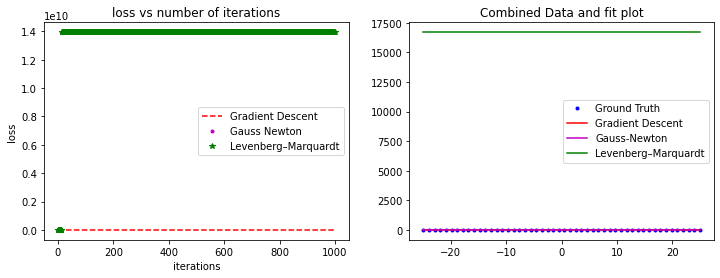

Gradient Descent converged at iteration  115
loss: 9.829260268328731
a_est: 9.608692938123435  m_est: 1.4171677571178727  s_est: 22.522468934557253
Gauss Newton converges at iteration  2
loss: 0.9331254378985017
a_est: 9.88531666444999  m_est: -0.36198719732811213  s_est: 19.907238165300324
The Levenberg–Marquardt Algorithm didn't converge in  999  iterations for given parameters of tolerance 10.0  learning rate 0.0
loss: 3226.679398346162
a_est: -52.6157167578999  m_est: 120.26337222770415  s_est: 6.272041173978692


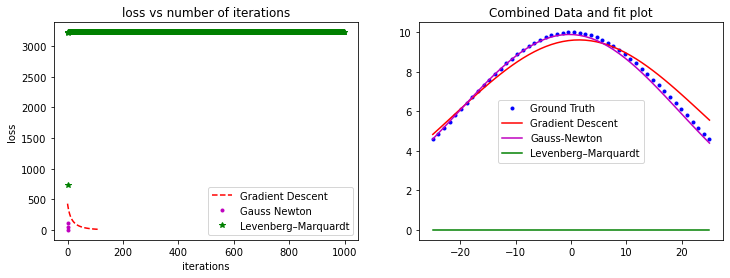

gradient descent algorithm didn't converge in  999  iterations for given parameters of tolerance 10.0  learning rate 0.1
loss: 3226.679414252767
a_est: -125.51620545318187  m_est: 80.49221057521616  s_est: -9.042245279619415
Gauss Newton converges at iteration  2
loss: 0.9331254378985017
a_est: 9.88531666444999  m_est: -0.36198719732811213  s_est: 19.907238165300324
The Levenberg–Marquardt Algorithm didn't converge in  999  iterations for given parameters of tolerance 10.0  learning rate 0.0
loss: 3226.679398346162
a_est: 0.03948740909722631  m_est: -121.32742468714017  s_est: 6.5949103333358465


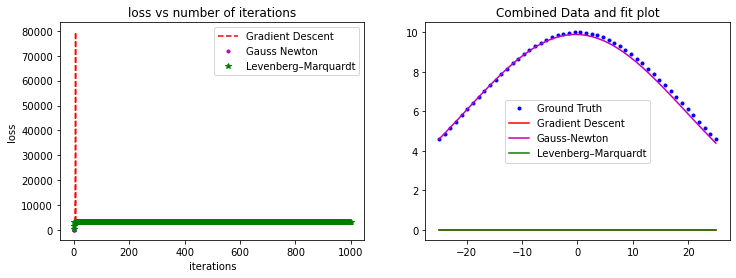

gradient descent algorithm didn't converge in  999  iterations for given parameters of tolerance 10.0  learning rate 1.0
loss: 251.12364291814873
a_est: 440142.66885355505  m_est: -167867.68666039224  s_est: -36167.47894579422
Gauss Newton converges at iteration  2
loss: 0.9331254378985017
a_est: 9.88531666444999  m_est: -0.36198719732811213  s_est: 19.907238165300324
The Levenberg–Marquardt Algorithm didn't converge in  999  iterations for given parameters of tolerance 10.0  learning rate 0.0
loss: 40.81843117599025
a_est: 11.160387108987731  m_est: 0.03049739567784374  s_est: 19.81417321630422


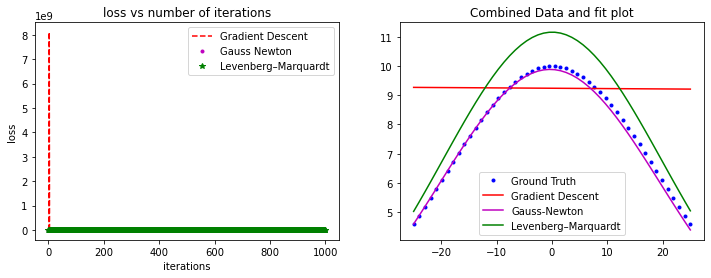

gradient descent algorithm didn't converge in  999  iterations for given parameters of tolerance 10.0  learning rate 2.0
loss: 3226.679398346162
a_est: -285725.2570507009  m_est: -72661.47692430415  s_est: -1907.0478644905234
Gauss Newton converges at iteration  2
loss: 0.9331254378985017
a_est: 9.88531666444999  m_est: -0.36198719732811213  s_est: 19.907238165300324
Levenberg–Marquardt converges at iteration  1
loss: 0.3102651778525532
a_est: 10.055614243311798  m_est: -0.29085726401647405  s_est: 19.94241757987787


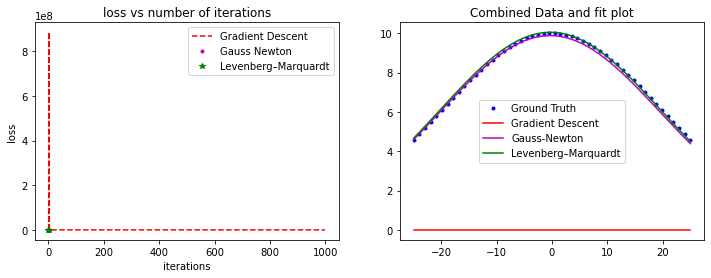

gradient descent algorithm didn't converge in  999  iterations for given parameters of tolerance 10.0  learning rate 3.0
loss: 8.423179077164466e+42
a_est: 3.0266628797201995e+26  m_est: -5.5626608307154726e+25  s_est: -1.070102501920274e+25
Gauss Newton converges at iteration  2
loss: 0.9331254378985017
a_est: 9.88531666444999  m_est: -0.36198719732811213  s_est: 19.907238165300324
Levenberg–Marquardt converges at iteration  1
loss: 3.0088769859052276
a_est: 9.84031614186553  m_est: -0.8584666427469769  s_est: 21.056030230067115


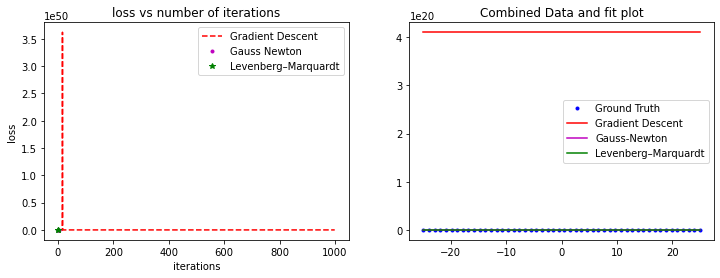

gradient descent algorithm didn't converge in  999  iterations for given parameters of tolerance 10.0  learning rate 4.0
loss: 3226.679398346162
a_est: -5.278964399787951e+22  m_est: -2.728357095189793e+22  s_est: 4.719937221661777e+20
Gauss Newton converges at iteration  2
loss: 0.9331254378985017
a_est: 9.88531666444999  m_est: -0.36198719732811213  s_est: 19.907238165300324
Levenberg–Marquardt converges at iteration  1
loss: 4.91744887598515
a_est: 9.676073010471722  m_est: -0.7889680393594967  s_est: 21.900506843291296


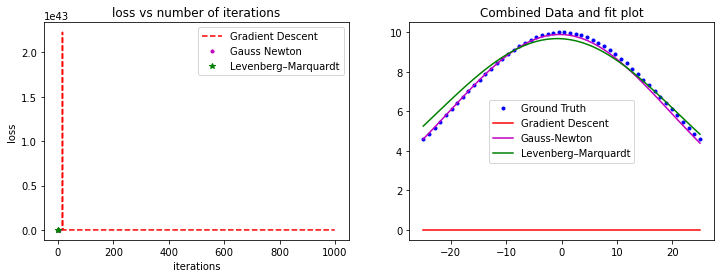

gradient descent algorithm didn't converge in  999  iterations for given parameters of tolerance 10.0  learning rate 5.0
loss: 3226.6793983461585
a_est: 186720.26345227615  m_est: -13284.99955973455  s_est: -1399.004163212634
Gauss Newton converges at iteration  2
loss: 0.9331254378985017
a_est: 9.88531666444999  m_est: -0.36198719732811213  s_est: 19.907238165300324
Levenberg–Marquardt converges at iteration  1
loss: 6.39340371788661
a_est: 9.55222990423771  m_est: -0.4695113786511165  s_est: 22.524121299443582


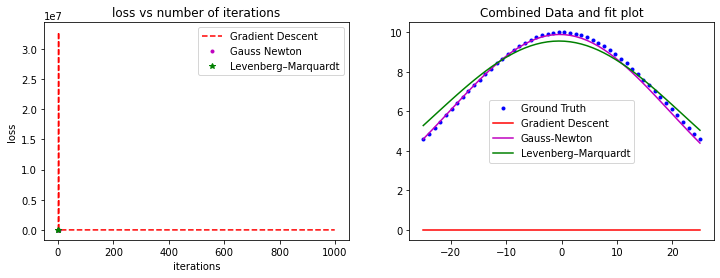

gradient descent algorithm didn't converge in  999  iterations for given parameters of tolerance 10.0  learning rate 8.0
loss: 3226.6793985238173
a_est: -2094.2695584751345  m_est: -436.9266543183346  s_est: 55.275255914070016
Gauss Newton converges at iteration  2
loss: 0.9331254378985017
a_est: 9.88531666444999  m_est: -0.36198719732811213  s_est: 19.907238165300324
Levenberg–Marquardt converges at iteration  2
loss: 4.078203880555645
a_est: 10.279607290230144  m_est: -0.5681265586126731  s_est: 18.579654474323313


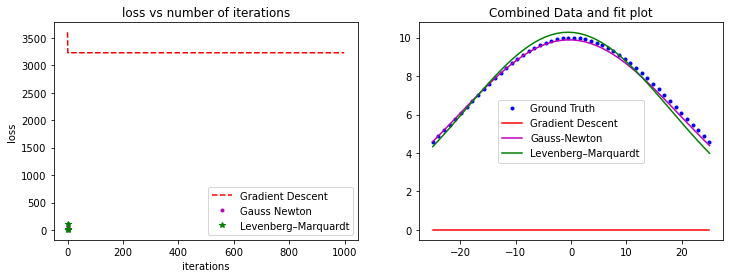

gradient descent algorithm didn't converge in  999  iterations for given parameters of tolerance 10.0  learning rate 10.0
loss: 3226.679398346162
a_est: -3169.1548473035214  m_est: -591.1815735283033  s_est: 16.740048387473166
Gauss Newton converges at iteration  2
loss: 0.9331254378985017
a_est: 9.88531666444999  m_est: -0.36198719732811213  s_est: 19.907238165300324
Levenberg–Marquardt converges at iteration  2
loss: 5.730362110598665
a_est: 10.254077061575403  m_est: -1.0498505979479578  s_est: 18.798688886556167


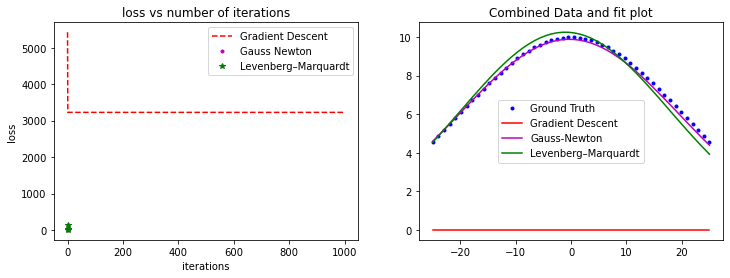

In [13]:
numberOfObservations = 50
xObserved = np.linspace(-25, 25, numberOfObservations)
a_gt = 10
m_gt = 0
s_gt = 20
a_est = 10
m_est = 13
s_est = 19.12
yObserved = gaussian(xObserved, a_gt, m_gt, s_gt)
calculatedPrameters = np.array([a_est, m_est, s_est])
learningrate = np.array([0.0001,0.001,0.01,0.1,1,2,3,4,5,8,10])

for l in learningrate:    
    ygd,lgd = gradDescent(xObserved,yObserved,calculatedPrameters,l,1e+1)
    ygn,lgn = gaussNewton(xObserved,yObserved,calculatedPrameters,l,1e+1)
    ylm,llm= LM(xObserved,yObserved,calculatedPrameters,l,1e+1)
    combinedplot(xObserved,yObserved,ygd,lgd,ygn,lgn,ylm,llm)

We see now that Levenberg–Marquard converges in equal iterations or less iterations as Gauss Newton on larger learning rates whereas gradient descent takes comparatively large number of iterations

## Answers for Question 1
Add explanations for the answers along with tables here.
### Answer for 1.1
We experiment intensively as shown in figures shown above and report some of our experimentations. <br>
**observed trends** <br> 1) If the learning rate is too high or too small, theGradient descent algorithm doesnt converge. <br>
Explanation: With a small learning rate, the Gradient Descent algorithm is prone to taking a long time to converge and thus won't converge in the given upper bound on iterations. If we use too large a learning rate, the gradient descent algorithm is prone to overshooting the minima. <br>
2)Decrease in tolerance results in decrease in loss and number of iterations<br>
Explnation: False, a decrease in tolerance would lead to a decrease in loss as there's a smaller acceptable RMSE value but that wouldn't lead to a decrease in the number of iterations as to achieve such stringent conditions, the algorithm needs to run further iterations.


| Learning rate        | tolerance           | loss  |num of iterations to converge |
| ------------- |:-------------:| -------:|-------:|
| 0.01    | 1e-2     | 0.0098 |437 |
| 0.01    | 1e-1    | 0.098 |337 |
| 0.1    | 1e-2     | 0.0098|437 |
| 1    | 1e-1    | 0.098 |337 |
| 0.0001    | 1e-2   | 244.49(at iter 999) |didn't converge in 999 iterations |
| 0.001    | 1e-2  | 14.12(at iter 999)|didn't converge in 999 iterations |
| 0.01    | 1e-2    | 0.0098 |437 |
| 0.1    | 1e-2  | 3226.67(at iter 999) |didn't converge in 999 iterations |
| 1   | 1e-2   | 251.123(at iter 999) |didn't converge in 999 iterations |

### Answer for 1.2
**Learning rate** 0.01 for Gradient Descent and Gauss Newton,
10 for LM <br>
**Tolerance** 1e-2 for Gradient Descent and Gauss Newton, 
1e+1 for LM <br>
* The Gradient Descent, Gauss Newton and LM converge for above values of learning rate and toleracne in given extimate of  s_gt = 20, a_est = 10, m_est = 13, s_est = 19.12 and 50 observations. <br>
* The learning rate and tolerance kept fixed otherwise explicitly mentioned for below experimentations in order to find a good comparison of changes from initial convergence.  Also in row (for Different initial estimate say) only that row's mentioned change is there, rest all params are kept fixed. <br>
* Please check learning rate's stats printed along with graphs just above the cell(not reporting the same for sake of conveniance of comparison in table)

| Action      |  Gradient Descent          | Gauss Newton  |LM   |
| ------------- |:-------------:| -------:|-------:|
| #Iterations(for tolerance 1e-2) | 437(loss: 0.0098)    | 3(loss: ~0)|  doesnt converge |
| #Iterations(tolerance 1e-1) | 337(loss: 0.098)   | 3(loss: ~0)|  doesnt converge |
| #Iterations(tolerance 1) | 229(loss:0.987)   | 2(loss: 0.933)|  doesnt converge |
| #Iterations(tolerance 1e+1) | 115 (loss: 9.829)   | 2(loss: 0.933)|  2(loss: 5.73) |
| Different Initial estimate: far different   | doesn't converge     | converges|doesn't converge |
| bit different |converges| converges|doesnt converge|
| Different number of observations: v small(<5)  | doesn't converge     | converges|converges |
| small(<=20) |doesn't converge | converges|converges|
| medium(<=42) |doesn't converge | converges|converges|
| large(>=48) |converges | converges|converges|
| on adding small noise  | doesn't converge     | converges|doesn't converge |
| on adding medium noise  | doesn't converge     | converges|doesn't converge |
| on adding large noise  | doesn't converge     | doesnt converges|doesn't converge |




Please check graphs and observations demostrated in cells above<br>
*Some more observations*
* the Gauss-Newton method typically converges much faster than gradient-descent methods.
* The Levenberg-Marquardt method acts more like a gradient-descent method when the parameters are far from their optimal value, and acts more like the Gauss-Newton method when the parameters are close to their optimal value.
* On varying initial estimates, number of observations and addition of noise Gauss newton is seen to perform well. 
* Gradient descent is not able to converge on small number of observations since gradient steps are much smaller based on learning rate, where as the steps in GN and LM are much larger.
* LM is not able to converge when initial estimates are far from ground truth estimates
* When learning rate is  is decreased, the Levenberg-Marquardt method approaches the Gauss-Newton method, and the solution typically accelerates to the local minimum (and converges)
* The gradient descent doesnt converge on larger learning rates since it overshoots the minima and may oscillate. 
* When learning rate is too small(0.01) Levenberge Marquardt doesnt converge for 1000 iterations whereas Gauss newton does converge.
* However we found that on increasing learning rate along with increasing tolerance, Levenberg Marquardt converges in less or equal iterations than Gauss Newton.

# Question 2: ICP Coding
Implement basic ICP algorithm with (given) known correspondences. 
Let X be your point cloud observed from the initial position. Your robot moved and observed P1 as your current point cloud. Same with P2 under a different transformation. Now you wish to apply ICP to recover transformation between (X & P1) and (X & P2). Use *root mean squared error (rmse)* as the error metric.

In [14]:
# Visualizing ICP registration
def plot_icp(X, P, P0, i, rmse):
  plt.cla()
  plt.scatter(X[0,:], X[1,:], c='k', marker='o', s=50, lw=0)
  plt.scatter(P[0,:], P[1,:], c='r', marker='o', s=50, lw=0)
  plt.scatter(P0[0,:], P0[1,:], c='b', marker='o', s=50, lw=0)
  plt.legend(('X', 'P', 'P0'), loc='lower left')
  plt.plot(np.vstack((X[0,:], P[0,:])), np.vstack((X[1,:], P[1,:])) ,c='k')
  plt.title("Iteration: " + str(i) + "  RMSE: " + str(rmse))
  plt.axis([-10, 15, -10, 15])
  plt.gca().set_aspect('equal', adjustable='box')
  plt.draw()
  plt.pause(2)
  return

# Generating data for our simple ICP
def generate_data():
  
  # create reference data  
  X = np.array([[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 9, 9, 9, 9, 9, 9],
                [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,-1,-2,-3,-4,-5]])
  
  # add noise
  P = X + 0.05 * np.random.normal(0, 1, X.shape)
  
  # translate
  P[0,:] = P[0,:] + 1
  P[1,:] = P[1,:] + 1
  
  # rotate
  theta1 = ( 10.0 / 360) * 2 * np.pi
  theta2 = (110.0 / 360) * 2 * np.pi
  rot1 = np.array([[math.cos(theta1), -math.sin(theta1)],
                   [math.sin(theta1),  math.cos(theta1)]])
  rot2 = np.array([[math.cos(theta2), -math.sin(theta2)],
                   [math.sin(theta2),  math.cos(theta2)]])
  
  # sets with known correspondences
  P1 = np.dot(rot1, P)
  P2 = np.dot(rot2, P)
  
  return X, P1, P2

In [15]:
# TODO: Do tasks described in Q2                                             #
##############################################################################
def rms(X,P):
    return np.sqrt(np.sum(np.square(X-P))/X.shape[1])
def centroid(arr):
    return np.mean(arr, axis=1)

# Getting data X, P1, P2 from helper function generate_data(). 
X, P1, P2 = generate_data()
# Applying ICP between X and P_i. (in our case,(X & P1) and (X & P2))
def ICP(X, P):
    num_iter = 5
    P0 = P #Initialization
    for i in range(num_iter):
        # implementing ICP:
        # current error?
        rmse = rms(X,P)
        # calling the visualization helper function plot_icp.
        plot_icp(X, P, P0, i, rmse)
        # Implementation of ICP to get R, t
        #Computing the centroids of each point cloud
        ux = centroid(X)
        ux = ux.reshape(ux.shape[0],1)
        up = centroid(P)
        up = up.reshape(up.shape[0],1)
        #Computing a matrix capturing the spread of the two point clouds
        w = (1/X.shape[1])*np.dot((X.astype(np.float)- ux),(P.astype(np.float)- up).T)
        #Using the singular value decomposition of the matrix to get the optimal rotation
        u, s, v_t = np.linalg.svd(w, full_matrices=True)
#         d = np.linalg.det(u)*np.linalg.det(v_t)  
#         R = np.array([[1,0],[0,d]])
        R = u @ v_t
        #Using the optimal rotation to get the optimal translation by aligning the centroids
        t = (ux - R@up)
        t = t.reshape(t.shape[0],1)
        P = np.dot(R,P) + t #Uncomment this: transforming my current point cloud towards initial point cloud
    return
##############################################################################
#                             END OF YOUR CODE                               #
##############################################################################

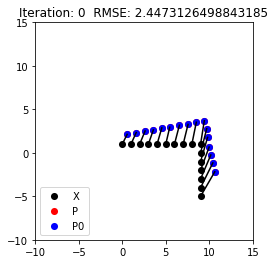

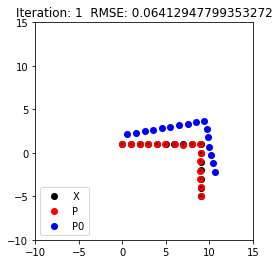

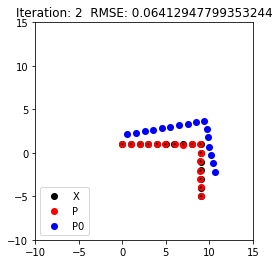

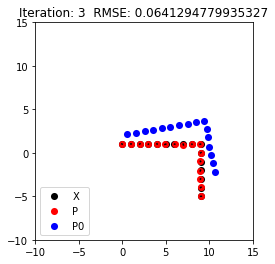

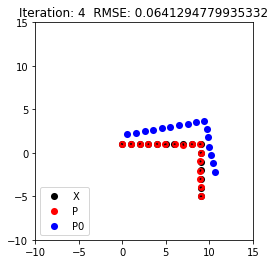

In [16]:
# Call ICP on P1 & P2
ICP(X,P1) 


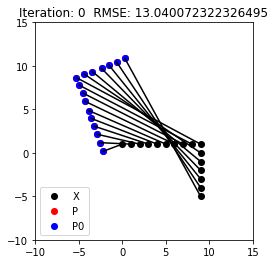

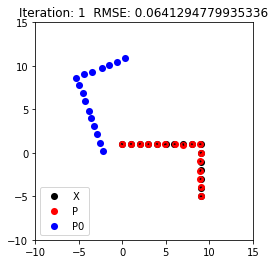

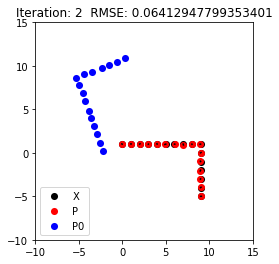

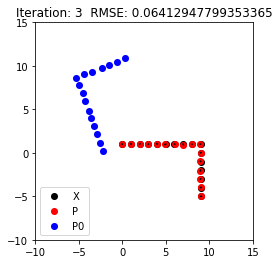

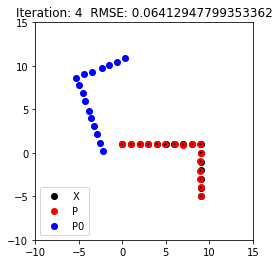

In [17]:
ICP(X,P2) 